# Django Form

In [ ]:
# forms.py:

from django import forms

class StudentRegistration(forms.Form) :
    name = forms.CharField()
    password = forms.CharField(widget=forms.PasswordInput)

In [ ]:
# views.py:

from django.shortcuts import render
from .forms import StudentRegistration

def showformdata(request):
    form = StudentRegistration()
    context = {'form': form}
    return render(request, 'form.html', context)

In [ ]:
# urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('register/', views.showformdata)
]

In [2]:
# form.html:

<html>
    <body>
        {{form}}
    </body>
</html>

- label will be field name with first letter in uppercase and converting unserscores into spaces.
- value of `name` atrribute will field name of `StudentRegistration` class.
- value of `id` attribute will be `id_field_name`.

#### form rendering options

• {{form}} will render them all

• {{form.as_table}} will render them as table cells wrapped in `<tr>` tags

• {{form.as_p}} will render them wrapped in `<p>` tags

• {{form.as_ul}} will render them wrapped in `<li>` tags

• {{form.name_of_field}} will render field manually as given

### Configure id Attribute and label Tag and Dynamic initial Value

- If `auto_id` is set to a string containing the format character "%s", then the form gutput will include `<label>` tags, and will generate id attributes based on the format string.
- If `auto_id` is set to True, then the form output will include `<label>` tags and will use the field name as its id for each form field.
- If `auto_id` is False, then the form output will not include `<label>` tags nor id attributes.
- If `auto_id` is set to any other true value - such as a string that does not include "%s" then the library will act as if `auto_id` is true.

In [ ]:
# views.py:

from django.shortcuts import render
from .forms import StudentRegistration

def showformdata(request):
    form = StudentRegistration(auto_id='some_%s') # id=some_name, id=some_email
    form = StudentRegistration(auto_id=True) # id=name, id=email
    form = StudentRegistration(auto_id="mahesh") # id=name, id=email
    form = StudentRegistration(auto_id=False) # No id attribute
    context = {'form': form}
    return render(request, 'form.html', context)

- `label_suffix` - A translatable string (defaults to a colon (:) in English) that will be appended after any label name when a form is rendered.

- `initial` is used to declare the initial value of form fields at runtime.

In [ ]:
# views.py:

from django.shortcuts import render
from .forms import StudentRegistration

def showformdata(request):
    form = StudentRegistration(label_suffix=' ', initial={'name':'John Doe', 'email':'abc@d.com'})
    context = {'form': form}
    return render(request, 'form.html', context)

### ordering form fields

In [ ]:
# views.py:

from django.shortcuts import render
from .forms import StudentRegistration

def showformdata(request):
    form = StudentRegistration()
    form.order_fields(field_order=['email', 'name'])
    context = {'form': form}
    return render(request, 'form.html', context)

### rendering form field manually

Each field is available as an attribute of the form using `{{form.name_of_field}}`

- `{{field.label}}` - The label of the field.
    
    Example: - {{ form.name.label }}

- `{{field.label_tag}}` - The field's label wrapped in the appropriate HTML `<label>` tag. This includes the form's `label_suffix`. The default `label_suffix` is a colon(:)

    Example: - {{form.name.label_tag}}

- `{{field.id_for_label}}` - The ID that will be used for this field.

    Example: - {{form.name.id_for_label}}

- `{{field.value}}` - The value of the field.

    Example:- {{form.name.value}}

- `{{field.html_name}}` - The name of the field that will be used in the input element's name field. This takes form prefix into account, if it has been set.
    
    Example: - {{form.name.html_name}}
    
- `{{field.help_text}}` - Any help text that has been associated with the field.

    Example: - {{form.name.help_text}}
                                                     
- `{{field.field}}` - The Field instance from the form class that this BoundField wraps. You can use it to access Field attributes.

    Example: - {{form.name.field.help_text}}

- `{{field.is_hidden}}` - This attribute is True if the form field is a hidden field and False otherwise. It's not particularly useful as a template variable, but could be useful in conditional tests such as:
    
    (% if field.is_hidden %}
        {# Do something special #}
    {% endif %}

# How to Get Form Data and Validate Data

- `is_valid()` - This method is used to run validation and return a Boolean designating whether the data was valid as True or not as False. This returns True or False.
Syntax:- Form.is_valid()


- `cleaned_ data` - This attribute is used to access clean data. Each field in a Form class is responsible not only for validating data, but also for "cleaning" it normalizing it to a consistent format. This is a nice feature, because it allows data for a particular field to be input in a variety of ways, always resulting in consistent output. Once you've created a Form instance with a set of data and validated it, you can access the clean data via its `cleaned_data` attribute.

- Any text based field such as CharField or EmailField always cleans the input into a string.
- If your data does not validate, the `cleaned_data` dictionary contains only the valid fields.
- `cleaned_data` will always only contain a key for fields defined in the Form, even if you pass extra data when you define the Form.
- When the Form is valid, `cleaned_data` will include a key and value for all its fields, even if the data didn't include a value for some optional fields.

In [ ]:
# forms.py:

from django import forms
class StudentRegistration(forms.Form):
    name=forms.CharField()
    email=forms.EmailField()


In [ ]:
# views.py:

from forms import StudentRegistration

def showformdata(request):
    if request.method='POST':
        fm = StudentRegistration(request.POST)
        if fm.is_valid():
            print("valideted form")
            print("Name: ", fm.cleaned_data['name'])
            print("Email: ", fm.cleaned_data['email'])
    else:
        fm = Studentitegistration()
    return render(request, 'registrationform.html', {'form':fm})

In [ ]:
# registrationform.html:

<html >
    <body>
        <form method="POST"> 
            {% csrf_token%}

            {{form.as_p}}
            <input type="submit" value="Submit">
        </form>
    </body>
</html>

<pre id='a1'></pre>
# Cleaning and Validating specific form field

`clean_<fieldname>` - This method is called on a form subclass where `<fieldname>` is replaced with the name of the form field attribute.

- This method does any cleaning that is specific to that particular attribute, unrelated to the type of field that it is.
- This method is not passed any parameters.
- You will need to look up the value of the field in `self.cleaned_data` and remember that it will be a Python object at this point, not the original string submitted in the form.

In [ ]:
# forms.py:

from django import forms

class StudentRegistration(forms.Form) :
    name = forms.CharField()
    email = forms.EmailField()
    password = forms.CharField(widget=forms.PasswordInput)

    def clean_name(self) :
        valname = self.cleaned_data['name']
        if len(valname)<4:
            raise forms.ValidationError('Enter more than or equal 4 char')
        return valname

<pre id='a2'></pre>
# Validating complete Django form

`clean` - The `clean()` method on a Field subclass is responsible for running `to_python()`, `validate()`, and `run_validators()` in the correct order and propagating their errors.

- If, at any time, any of the methods raise `ValidationError`, the validation stops and that error is raised.
- This method returns the clean data, which is then inserted into the `cleaned_data` dictionary of the form.
- Implement a `clean()` method on your Form when you must add custom validation for fields that are interdependent.

**Syntax:** `Form.clean()`

In [ ]:
# forms.py:

from django import forms

class StudentRegistration(forms.Form) :
    name = forms.CharField()
    email = forms.EmailField()

    def clean(self):
        cleaned_data = super().clean()
        valname = self.cleaned_data['name']
        valemail = self.cleaned_data['email']
        
        if len(valname) < 4:
            raise forms.ValidationError('Name should be more than or equal 4')
        if len(valemail) < 10:
            raise forms.ValidationError('Email should be more than or equal 10')

<pre id='a3'></pre>
# Match password

In [ ]:
# forms.py:

from django. core import validators
from django import forms

class StudentRegistration(forms.Form):
    name = forms.CharField()
    email = forms.EmailField()
    password = forms.CharField(widget=forms.PasswordInput)
    rpassword = forms.CharField(label= 'Password (again)', widget=forms.PasswordInput)
    
    def clean(self):
        cleaned_data = super().clean()
        valpwd = self.cleaned_data['password']
        valrpwd = self.cleaned_data['rpassword']
        if valpwd != valrpwd :
            raise forms.ValidationError('Password does not match')

<pre id='a4'></pre>
# Built-in validators

In [ ]:
# forms.py:

from django.core import validators # built in validators
from django import forms

class StudentRegistration(forms.Form):
    name = forms.CharField(validators=[validators.MaxLengthValidator(10)])
    email=forms.EmailField()

<pre id='a5'></pre>
# Custom validators

In [ ]:
# forms.py:

from django. core import validators # built in validators
from django import forms

def starts_with_s(value): # creating custom validators
    if value[0]!='s':
        raise forms.ValidationError("Name should start with s")

class StudentRegistration(forms.Form):
    name = forms.CharField(validators=[starts_with_s]) # applying custom validators
    email=forms.EmailField()

# Styling Django Form Errors and Field Error 

- `{{ field.errors }}` - It outputs a `<ul class="errorlist">` containing any validation errors corresponding to this field. You can customize the presentation of the errors with a `{% for error in field.errors %}` loop. In this case, each object in the loop is a string containing the error message.

Example:- 
<pre>
{{ form.name.errors }}
&lt;ul class="errorlist" &gt;
    &lt;li&gt; Enter Your Name &lt;/li&gt;
&lt;/ul&gt;
</pre>
- `{{ form.non_field_errors }}` - This should be at the top of the form and the template lookup for errors on each field.

Example:- 
<pre>
{{ form.non_field_errors }}
&lt;ul class="errorlist nonfield" &gt;
    &lt;li&gt; Generic validation error &lt;/li&gt;
&lt;/ul&gt;
</pre>

### Styling form errors

If you render a bound Form object, the act of rendering will automatically run the form's validation if it hasn't already happened, and the HTML output will include the validation errors as a `<ul class="errorlist">` near the field.
We can use this class errorlist to style error.

In [ ]:
# forms.py:

from django.core import validators
from django import forms

class StudentRegistration(forms.Form):
    name = forms.CharField(error_messages={'required': 'Enter Your Name '})
    email = forms.EmailField(error_messages={'required': 'Enter Your Email' })
    password = forms.CharField(widget=forms.PasswordInput, error_messages={'required': 'Enter Your Password'})

if there is no error, then we don't see any `<ul>` tag, but when error occur then we will be able to see `<ul class="errorlist">`

At this point, error message will be displayed above filed label. In order to postion error message for different fields and different places, then we need to render it one by one. 

In [ ]:
# templates.html:

<form action="" method="POST" novalidate>

    {% csrf_token %}
    
    {{ form.non_field_errors }}
    {% for field in form %}
    
        <div>
            {{ field.label_tag }} {{ field }} {{ field.errors }}
        </div>
    
    {% endfor %}
    ‹input type="submit" value="Submit"›
     
</form>

With above code, error will be displayed below the field label(but we want to display error in parallel to field) and If we view source page then will found that error message is inside `<ul>` tag (due to which error are displayed below) and we don't want that. For this we will use a filter `striptags`. What this will do is it will remove tags of error message, only text will remain there.

In [ ]:
# templates.html:

<form action="" method="POST" novalidate>

    {% csrf_token %}
    
    {{ form.non_field_errors }}
    {% for field in form %}
    
        <div>
            {{ field.label_tag }} {{ field }} {{ field.errors|striptags }}
# striptags will remove tag (here it will remove <ul> on error message)
        </div>
    
    {% endfor %}
    ‹input type="submit" value="Submit"›
     
</form>

In order to add css to this error message, we will put that error in `<span>` tag and class

In [ ]:
# templates.html:

<style>
    .errorlist{
        color:red;
        font-size: 10px;
        margin: 0;
        padding: 0;
    }
</style>

<form action="" method="POST" novalidate>

    {% csrf_token %}
    
    {{ form.non_field_errors }}
    {% for field in form %}
    
        <div>
            {{ field.label_tag }} {{ field }} <span class="errorlist">{{ field.errors|striptags }}</span>
        </div>
    
    {% endfor %}
    ‹input type="submit" value="Submit"›
     
</form>

Now, we view source code of page then we found error message inside `<span>` tag with class="errorlist".

Now, let's add `min_length` and `max_length` to our `email` and `password` field and let's see what happens?:

In [ ]:
# forms.py:

from django.core import validators
from django import forms

class StudentRegistration(forms.Form):
    name = forms.CharField(error_messages={'required': 'Enter Your Name '})
    email = forms.EmailField(error_messages={'required': 'Enter Your Email' }, min_length=4, max_length=100)
    password = forms.CharField(widget=forms.PasswordInput, error_messages={'required': 'Enter Your Password'}, min_length=4, max_length=100)

If we enter "qwr" in email field, we will find two error message are diaplayed together beacuse it is violating two validation first is `required` and second is `min_length`. On viewing source code we will found both message are in same `<span>` tag. We want separately handle error in case of more than one errors on a field: 

In [ ]:
# templates.html:

<style>
    .errorlist{
        color:red;
        font-size: 10px;
        margin: 0;
        padding: 0;
    }
</style>

<form action="" method="POST" novalidate>

    {% csrf_token %}
    
    {{ form.non_field_errors }}
    {% for field in form %}
    
        <div>
            {{ field.label_tag }} {{ field }} 
            {% for error in field.errors %}
            
                <span class="errorlist">{{ error }}</span>
            
            {% endfor %}
        </div>
    
    {% endfor %}
    ‹input type="submit" value="Submit"›
     
</form>

- `error_css_class` and `required_css_class` - These Form class hooks can be used to add class attributes to required rows or rows with errors. Rows will be given "error" and/or "required" classes, as needed.

Example:-

    class StudentRegistration(forms.Form):
        error_css_class = 'error'
        required_css_class = 'required'

In [ ]:
# forms.py:

from django.core import validators
from django import forms

class StudentRegistration(forms.Form):
    error_css_class = 'error' # apply this class='error' to all field 
    required_css_class = 'required'
    name = forms.CharField(error_messages={'required': 'Enter Your Name '})
    email = forms.EmailField(error_messages={'required': 'Enter Your Email' }, min_length=4, max_length=100)
    password = forms.CharField(widget=forms.PasswordInput, error_messages={'required': 'Enter Your Password'}, min_length=4, max_length=100)

In [ ]:
# templates.html:

<style>
    .error{
        color:red;
        font-size: 10px;
        margin: 0;
        padding: 0;
    }
</style>

<form action="" method="POST" novalidate>

    {% csrf_token %}
    
    {{ form }}
    ‹input type="submit" value="Submit"›
     
</form>

# Save Update and Delete Form Data to/from Database 

1. Open `forms.py` and create a form with fileds like name, email and password
2. Open `templates.html` and write the following lines of code
3. Open `models.py` and write following lines of code
4. Open `admin.py` and register the model using following lines of code
5. Run command: `python manage.py makemigrations`
6. Run command: `python manage.py migrate`
7. Open `views.py` and write following lines of code to save form data in database

In [ ]:
#Step1- forms.py:

from django.core import validators
from django import forms

class StudentRegistration(forms.Form):
    name = forms.CharField(error_messages={'required': 'Enter Your Name '})
    email = forms.EmailField(error_messages={'required': 'Enter Your Email' })
    password = forms.CharField(widget=forms.PasswordInput, error_messages={'required': 'Enter Your Password'})

In [ ]:
#Step2- templates.html:

<form action="" method="POST" novalidate>

    {% csrf_token %}
    
    {{ form.as_p }}
    ‹input type="submit" value="Submit"›
     
</form>

In [ ]:
#Step3- models.py:

from django.db import models
# Create your models here.

class User(models.Model):
    name = models.CharField(max_Length=70)
    email = models.EmailField(max_Length=100)
    password = models.CharField (max_Length=100)

In [ ]:
#Step4- admin.py:

from django.contrib import admin
from .models import User
# Register your models here.

@admin.register(User)
class UserAdmin(admin.ModeLAdmin) :
    list_display = ['id', 'name', 'email', 'password']

In [ ]:
#Step7- views.py:

from django.shortcuts import render
from .forms import StudentRegistration
from .models import User

def showFordata(request):
    if request.method == 'POST':
        fm = StudentRegistration(request.POST)
        if fm.is_valid():
            nm = fm.cleaned_data['name']
            em = fm.cleaned_data['email']
            pw = fm.cleaned_data['password']
            
            # insert:
            reg = User(name=nm, email=em, password=pw) 
            reg.save() 
            
            # update:
            reg = User(id=3, name=nm, email=em, password=pw) 
            reg.save() 
            
            # delete:
            reg = User(id=3) 
            reg.delete() 
            
    else:
        fm = StudentRegistration()

    return render(request, 'template.html', {'form':fm})

# Model form

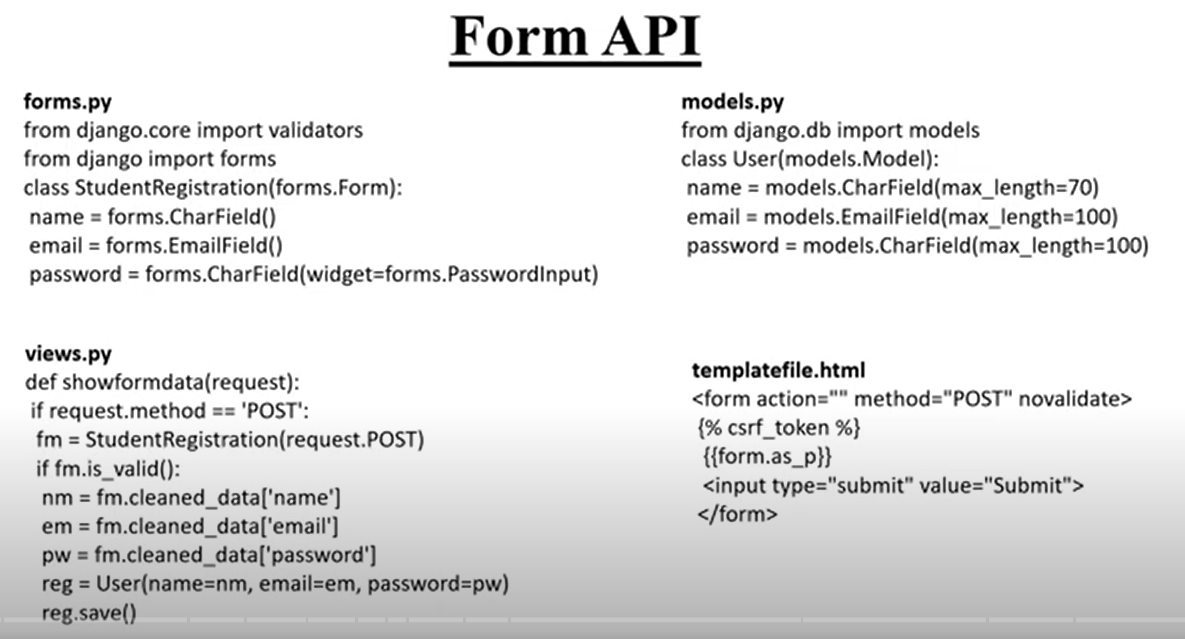

In [ ]:
# forms.py:

from django import forms
from .models import User

class Registration(forms.ModelForm):
    name = forms.CharField(max_length=90, required=False) # 'required' validators 
    # this validators have high priority than validtors in models.py

    # fields inform other then model fields can be included here:
    father_name = forms.CharField(max_length=100, required=False)
    mother_name = forms.CharField(max_length=100, required=False)
    
    class Meta:
        model = User # we cannot use mutiple model in ModelForm
        fields = ['name', 'password', 'email'] # fields of model to be included in form
        labels = {'name': 'Enter Name',
                  'password': 'Enter Password',
                  'email': 'Enter Email'}
        help_text = {'name': 'Enter Your Full Name'}
        error_messages = {'name': {'required': 'Naam Likhna Jaruri Hai'},
                        'password': {'required': 'Password Likhna Jaruri Hai'}} 
        widgets = {'password': forms.PasswordInput,
                'name': forms.TextInput(attrs= {'class': 'myclass', 
                                                'placeholder': 'Yaha Naam likhe'}), }

**Note:**  `ModelForm` is specifically tied to a single model

### save()

`save(commit=False/True)` Method - This method creates and saves a database object from the data bound to the form.

- A subclass of ModelForm can accept an existing model instance as the keyword argument instance, if this is supplied, save() will update that instance.

- If it's not supplied, save() will create a new instance of the specified model.

- If the form hasn't been validated, calling save() will do so by checking form.errors.

**Syntax:**- `save(commit=False/True)`

- If `commit=False`, then it will return an object that hasn't yet been saved to the database. This is useful if you want to do custom processing on the object before saving it, or if you want to use one of the specialized model saving options.

- If your model has a many-to-many relation and you specify `commit=False` when you save a form, Django cannot immediately save the form data for the many-to-many relation. This is because it isn't possible to save many-to-many data for an instance until the instance exists in the database.

In [ ]:
# views.py:

from django. shortcuts import render
from .forms import StudentRegistration
from - models import User
# Create your views here.

def showformdata(request):
    if request.method == 'POST' :
        fm = StudentRegistration(request.POST)
        if fm.is_valid():
            nm = fm.cleaned_data['name']
            em = fm.cleaned_data['email']
            pw = fm.cleaned_data['password']
            
            reg = User(name=nm, email=em, password=pw) 
            reg.save()
            
            # update:
            reg = User(id=3, name=nm, email=em, password=pw) 
            reg.save() 
            
            # delete:
            reg = User(id=3) 
            reg.delete() 
    else:
        fm = StudentRegistration()

    return render(request, 'template.html', {'form':fm})

We have one more method to update data:

In [ ]:
# views.py:

from django. shortcuts import render
from .forms import StudentRegistration
from .models import User
# Create your views here.

def showformdata(request):
    if request.method == 'POST' :
        pk = User.objects.get(pk=3)
        fm = StudentRegistration(request.POST, instance=pk)
        if fm.is_valid():
            fm.save() # save using fm
    else:
        fm = StudentRegistration()

    return render(request, 'template.html', {'form':fm})

### Selecting ModelForm fields

In [ ]:
# forms.py:

from django import forms
from - models import User

class StudentRegistration(forms.ModeLForm):
    class Meta:
        model = User
        fields = ['name', 'email', 'password'] # can be tuple also
        fields = '__all__'
        exclude =('name' ,) # can be list also

### Mutiple models:

We can use mutiple models in our form (not ModeForm) using following approach.

Suppose you have three models: Person, Address, and ContactInfo. You want to create a form that combines fields from these models.

**Approach1 :** 

In [ ]:
# models.py:

from django.db import models

class Person(models.Model):
    first_name = models.CharField(max_length=100)
    last_name = models.CharField(max_length=100)

class Address(models.Model):
    person = models.OneToOneField(Person, on_delete=models.CASCADE)
    street = models.CharField(max_length=255)
    city = models.CharField(max_length=100)

class ContactInfo(models.Model):
    person = models.OneToOneField(Person, on_delete=models.CASCADE)
    phone_number = models.CharField(max_length=15)
    email = models.EmailField()


In [ ]:
# forms.py

from django import forms
from .models import Person, Address, ContactInfo

class CombinedForm(forms.Form):
    first_name = forms.CharField(max_length=100)
    last_name = forms.CharField(max_length=100)
    street = forms.CharField(max_length=255)
    city = forms.CharField(max_length=100)
    phone_number = forms.CharField(max_length=15)
    email = forms.EmailField()

    def save(self):
        # Extract the data from the form
        first_name = self.cleaned_data.get('first_name')
        last_name = self.cleaned_data.get('last_name')
        street = self.cleaned_data.get('street')
        city = self.cleaned_data.get('city')
        phone_number = self.cleaned_data.get('phone_number')
        email = self.cleaned_data.get('email')

        # Create or update Person instance
        person, created = Person.objects.get_or_create(
            first_name=first_name,
            last_name=last_name
        )

        # Create or update Address instance
        Address.objects.update_or_create(
            person=person,
            defaults={'street': street, 'city': city}
        )

        # Create or update ContactInfo instance
        ContactInfo.objects.update_or_create(
            person=person,
            defaults={'phone_number': phone_number, 'email': email}
        )


In [ ]:
# views.py:

from django.shortcuts import render, redirect
from .forms import CombinedForm

def create_combined_data(request):
    if request.method == 'POST':
        form = CombinedForm(request.POST)
        if form.is_valid():
            form.save() # this will invoke save() methof of CombinedForm class
            return redirect('success')
    else:
        form = CombinedForm()
    
    return render(request, 'create_combined_data.html', {'form': form})


In [ ]:
# create_combined_data.html

<form method="post">
    {% csrf_token %}
    {{ form.as_p }}
    <button type="submit">Submit</button>
</form>


**Approach2 :Using Multiple ModelForm Instances**

In [ ]:
# models.py:

from django.db import models

class Person(models.Model):
    first_name = models.CharField(max_length=100)
    last_name = models.CharField(max_length=100)

class Address(models.Model):
    person = models.OneToOneField(Person, on_delete=models.CASCADE)
    street = models.CharField(max_length=255)
    city = models.CharField(max_length=100)

class ContactInfo(models.Model):
    person = models.OneToOneField(Person, on_delete=models.CASCADE)
    phone_number = models.CharField(max_length=15)
    email = models.EmailField()


In [ ]:
# forms.py:

from django import forms
from .models import Person, Address, ContactInfo

class PersonForm(forms.ModelForm):
    class Meta:
        model = Person
        fields = ['first_name', 'last_name']

class AddressForm(forms.ModelForm):
    class Meta:
        model = Address
        fields = ['street', 'city']

class ContactInfoForm(forms.ModelForm):
    class Meta:
        model = ContactInfo
        fields = ['phone_number', 'email']


In [ ]:
# Create a custom form that includes instances of the above forms:

from django import forms
from .models import Person, Address, ContactInfo

class CombinedForm(forms.Form):
    person_form = PersonForm()
    address_form = AddressForm()
    contact_info_form = ContactInfoForm()

    def save(self):
        person_data = self.cleaned_data['person_form']
        address_data = self.cleaned_data['address_form']
        contact_info_data = self.cleaned_data['contact_info_form']

        # Save or update Person instance
        person = Person.objects.create(**person_data)

        # Save or update Address instance
        address = Address.objects.create(person=person, **address_data)

        # Save or update ContactInfo instance
        contact_info = ContactInfo.objects.create(person=person, **contact_info_data)


In [ ]:
# views.py:

from django.shortcuts import render, redirect
from .forms import CombinedForm

def create_combined_data(request):
    if request.method == 'POST':
        form = CombinedForm(request.POST)
        if form.is_valid():
            form.save()
            return redirect('success')
    else:
        form = CombinedForm()
    
    return render(request, 'create_combined_data.html', {'form': form})


In [ ]:
# create_combined_data.html:

<form method="post">
    {% csrf_token %}
    {{ form.person_form.as_p }}
    {{ form.address_form.as_p }}
    {{ form.contact_info_form.as_p }}
    <button type="submit">Submit</button>
</form>


In [ ]:
# forms.py:

from django import forms
from - models import User

class StudentRegistration(forms.ModeLForm):
    class Meta:
        model = User
        fields = ['name', 'email', 'password'] # can be tuple also
        fields = '__all__'
        exclude =('name' ,) # can be list also

# Dynamic URL

`str` - Matches any non-empty string, excluding the path separator, '/'. This is the default if a converter isn't included in the expression.

`int` - Matches zero or any positive integer. Returns an int.

`slug` - Matches any slug string consisting of ASCIl letters or numbers, plus the hyphen and underscore characters. For example, building-your-1 st-django-site.

`uuid` - Matches a formatted UUID. To prevent multiple URLs from mapping to the same page, dashes must be included and letters must be lowercase. For example, `075194d3-6885-417e-a8a8-6c931e27200`. Returns a UUID instance.

`path` - Matches any non-empty string, including the path separator, /'. This allows you to match against a complete URL path rather than a segment of a URL path as with str.

1. Open `urls.py` and write following lines of code
2. Open `home.html` and write following lines of code
3. Open `show.html` and write following lines of code
4. Open `views.py` and write following lines of code

In [ ]:
#Step1- urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('', views.home, name="ghar"),
    path( 'student/<my_id>/', views.show_details, name="detail"), # default <str:my_id>
]

In [ ]:
#Step2- home.html:

<body>
    <h2>This is Home Template File</h2>
    <a href="{% url 'detail' 1 %}"›Student 1</a>
    <a href="{% url 'detail' 2 %}"›Student 2k/a>
    <a href="(% url 'detail' 3 %}"›Student 3</a>
</body>

In [ ]:
#Step3- show.html:

<body>
    <h2>This show Template File</h2>
    <h4>{{id}}</h4>
    <h4>{{name}}</h4>
    <a href="(% url 'ghar' %}"›Back to home</a>
</body>

In [ ]:
#Step4- views.py:

from django.shortcuts import render
# Create your views here.

def home(request) :
    return render(request, 'home.html')

def show_details (request, my_id) :
    if my_id == '1':
        student = {'id':my_id, 'name': 'Rohan'}
    if my_id == '2':
        student = {'id':my_id, 'name': 'Sonam'}
    if my_id == '3':
        student = {'id':my_id, 'name': 'Ali'}
        
    return render(request, 'show.html', student)

### sub id

In [ ]:
# urls.py:

from django.urls import path
from . import views
urlpatterns = [
    path('', views.home, name="ghar"),
    path(' student/‹int:my_id>/', views. show_details,name="detail"),
    path(' student/< int:my_id>/<int:my_subid>/', views.show_subdetails, name="subdetail"),
]

#------------------------------

# home.html:

<body>
    <h2>This is Home Template File‹/h2>
    <a href="{% url 'detail' 1 %}"›Student 1</a>
    <a href="{% url 'detail' 2 %}"›Student 2</a>
    <a href="{% url 'detail' 3 %}"›Student 3</a>

    <a href="(% url 'subdetail' 1 5 %}">Sub Student 1</a> # url: 1/5
    <a href="{% url 'subdetail' 2 6 %}">Sub Student 2</a> # url: 2/6
    <a href="{% url 'subdetail' 3 7 %}">Sub Student 3</a> # url: 3/7
</body>


# show.html:
<body>
    <h2>This show Template File</h2>
    <h4>{{id}}</h4>
    <h4>{{name}}</h4>
    <h4>{{info}}</h4>
    <a href="(% url 'ghar' %}"›Back to home</a>
</body>

# views.py:

def show_subdetails(request, my_id, my_subid):
    if my_id == 1 and my_subid == 5:
        student = {'id':my_id, 'name': 'Rohan', 'info': 'Sub Details'}
    if my_id == 2 and my_subid == 6:
        student = {'id':my_id, 'name': 'Sonam', 'info': 'Sub Details'}
    if my_id == 3 and my_subid == 7:
        student = {'id':my_id, 'name': 'Ali', 'info': 'Sub Details'}
        
    return render (request, 'show.html', student)

We can also assign default value to `my_id` and `my_subid` in order to handle case if no id and subid recieved.

# Custom Path Converters in Django

1. Create a file "converters.py" inside app
2. Open `converters.py` and write following lines of code
3. Open `urls.py` and write following lines of code
4. Open `viewss.py` and write following lines of code
5. Open `show.html` and write following lines of code

In [ ]:
#Step2- converters.py:

class FourDigitYearConverter:
    regex = '[0-9]{4}'
    def to_python(self,value): # function name should be same
        return int(value)
        
    def to_url(self,value): # function name should be same
        return f'{value: 4d}' # OR return '%4d'%value

In [ ]:
#Step3- urls.py (app level)

from django.urls import path, register_converter
from . import views, converters

register_converter(converters.FourDigitYearConverter, 'УУУУ')

urlpatterns = [
    path('session/<yyyy:year>/', views.show_sdetails, name="detail"),
]

In [ ]:
#Step4- views.py

def show_details(request, year) :
    student = {'id':year}
    return render(request, 'show.html', student)

In [ ]:
#Step5- show.html

<body>
    <h4>{{year}}</h4>
</body>

- `to_ python(self, value)` method, which handles converting the matched string into the type that should be passed to the view function. It should raise `ValueError` if it can't convert the given value. A `ValueError` is interpreted as no match and as a consequence a 404 response is sent to the user unless another URL pattern matches.

- `to _url(self, value)` method, which handles converting the Python type into a string to be used in the URL.

# Passing extra options to view functions

`path(route, view, kwargs=None, name=None)`

- The `kwargs` argument allows you to pass additional arguments to the view function or method. It should be a dictionary.

urls.py:

<pre>
urlpatterns = [
    path(route, view, kwargs=None, name=None)
]
</pre>

**Example:**

`urls.py:`

<pre>
urlpatterns = [
    path('', views.home, {'check': 'OK' }),
]
</pre>

`views.py:`
<pre>
def home(request, check):
    print(check)
</pre>

# ModelForm Inheritance

- Normal Python name resolution rules apply. If you have multiple base classes that declare a Meta inner class, only the first one will be used. This means the child's Meta, if it exists, otherwise the Meta of the first parent, etc.

- It's possible to inherit from both Form and ModelForm simultaneously, however, you must ensure that ModelForm appears first in the MRO. This is because these classes rely on different metaclasses and a class can only have one metaclass.

- It's possible to declaratively remove a Field inherited from a parent class by setting the name to be None on the subclass.

In [ ]:
# models.py:

from django.db import models
# Create your models here.

class User(models.Model) :
    student_name = models.CharField(max_length=100)
    teacher_name = models.CharField(max_length=100)
    email = models.EmailField(max_length=100)
    password = models.CharField(max_length=100)

In [ ]:
# admin.py:

from django.contrib import admin
from .models import User
# Register your models here.

@admin.register(User)
class UserAdmin(admin.ModeLAdmin):
    list_display = ['id', 'student_name', 'teacher_name', 'password','email']

In [ ]:
# forms.py:

from django import forms
from - models import User

class StudentRegistration(forms.ModelForm) :
    class Meta:
        model = User
        fields = ['student_name', 'email', 'password']
        
class TeacherRegistration(StudentRegistration):
    class Meta(StudentRegistration.Meta) :
        fields = ['teacher_name', 'email', 'password']

In [ ]:
# views.py:

from django.shortcuts import render
from . forms import StudentRegistration, TeacherRegistration
# Create your views here.

def student_form (request):
    if request.method == 'POST':
        fm = StudentRegistration(request.POST)
        if fm.is_valid():
            fm.save()
    else:
        fm = StudentRegistration()
    return render(request, 'student.html', {'form': fm})
    
def teacher_form(request):
    if request.method == 'POST':
        fm = TeacherRegistration(request.POST)
        if fm.is_valid():
            fm.save()
    else:
        fm = TeacherRegistration()
    return render(request, 'teacher.html', {'form': fm})

In [ ]:
# urls.py:

from django.urls import path
from . import views
urlpatterns = [
    path('stu/', views.student_form),
    path('tea/', views.teacher_form),
]

In [ ]:
# student.html:

<body>
    <form action="" method="post">
        {% csrf_token %}
        {{form.as_p}}
        <input type="submit" value="Submit">
    </form>
</body>

In [ ]:
# teacher.html:

<body>
    <form action="" method="post">
        {% csrf_token %}
        {{form.as_p}}
        <input type="submit" value="Submit">
    </form>
</body>

# Message frameworks

The messages framework allows you to temporarily store messages in one request and retrieve them for display in a subsequent request.

Django provides full support for cookie- and session-based messaging, for both anonymous and authenticated users.


<code>
    INSTALLED_APPS = ['django.contrib.messages']
    MIDDLEWARE = ['django.contrib.sessions.middleware.SessionMiddleware',
    'django.contrib.messages.middleware.MessageMiddleware']
    'context_processors': ['django.contrib.messages.context_processors.messages']
</code>
        

All above are available by default in `settings.py`.

### Messages level and tags

The messages framework is based on a configurable level architecture similar to that of the Python logging module.

Message Level - Message levels allow you to group messages by type so they can be filtered or displayed differently in views and templates.

Message Tag - Message tags are a string representation of the message level plus any extra tags that were added directly in the view. Tags are stored in a string and are separated by spaces. Typically, message tags are used as CSS classes to customize message style based on message type.

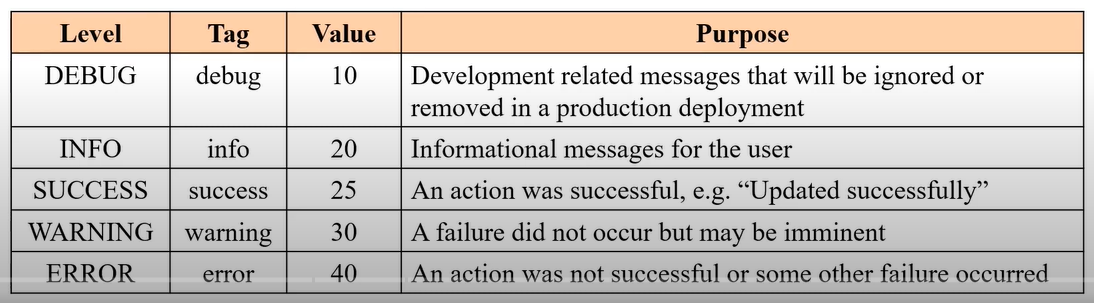

#### Write Message:-

`add_message(request, level, message, extra_tags='', fail_silently=False)` - This method is used to add/write messages.

Setting `fail_silently=True` only hides the MessageFailure that would otherwise occur when the messages framework disabled and one attempts to use one of the `add_message` family of methods. It does not hide failures that may occur reasons.

<code>
    from django.contrib import messages
    messages.add_message(request, messages.INFO, 'Info le lo info')
</code>

#### Write Message by Shortcut Methods:

<code>
    from django.contrib import messages
    messages.debug(request, '%s SQL statements were executed.'% count)
    messages.info(request, 'Three credits remain in your account.')
    messages.success(request, 'Profile details updated.")
    messages.warning(request, 'Your account expires in three days.')
    messages.error(request, 'Document deleted.')
</code>

#### Display Message:-

<code>
    {% if messages %}
        {% for message in messages %}
            {% if message.tags %} {{ message.tags }} {% endif %}
            {{ message }}
        {% endfor %}
    {% endif %}
</code>

In [ ]:
# models.py:

from django.db import models

# Create your models here.
class User(models.Model) :
    name-models. CharField(max_Length=70)
    password=models.CharField(max_Length=70)
    email-models. EmailField(max_Length=70)

In [ ]:
# forms.py:

from django import forms
from .models import User

class StudentRegistration(forms.ModelForm):
    class Meta:
        model = User
        fields = ['name', 'email', 'password']

In [ ]:
# admin.py:

from django. contrib import admin
# Register your models here.

@admin. register(User)
class UserAdmin(admin.ModelAdmin):
    list_display = ('id', 'name', 'email', 'password')

In [ ]:
# views.py:

from django. shortcuts import render
from .forms import StudentRegistration
from django.contrib import messages

# Create your views here.

def regi(request):
    if request.method == 'POST':
        fm = StudentRegistration(request.POST)
    if fm.is_valid():
        fm.save()
        messages.add_message(request, messages.SUCCESS, 'your account created') # 'SUCCESS' is message tag 
        
        # shortcut method:
        messages.success(request, 'your account created') # mostly used 
    else:
        fm = StudentRegistration()
        
    return render (request, 'userregistration.html', {'forms':fm})

In [ ]:
# urls.py:

from django.urls import path
from enroll import views
urlpatterns = [
    path('registration/', views.regi),
]

In [ ]:
# userregistration.html:

<body>

    <form action="" method="post">
        {% csrf_token %}
        {{form.as_p}}
        <input type="submit" value="Submit">
    </form>
    
    # we want to display message below form, so we will add our code here
    {% if messages %}
        {% for message in messages %}
            
            {% if message.tags %} {{message.tags}} {% endif %} # also displaying message tag that is SUCCESS, INFO, WARNING, ERROR
            
            {{message}} # displaying message
        {% endfor %}
    {% endif %}
    
</body>

We can use message tag for our CSS as well:

In [ ]:
# userregistration.html:

<head>
    <style> # CSS
        .success{
            color:green;
        }
    </style>
</head>

<body>

    <form action="" method="post">
        {% csrf_token %}
        {{form.as_p}}
        <input type="submit" value="Submit">
    </form>
    
    # we want to display message below from, so we will add our code here
    {% if messages %}
        {% for message in messages %}
            
            <span {% if message.tags %} class='{{message.tags}}' {% endif %}>
                {{message}}
            </span> 
            
        {% endfor %}
    {% endif %}
    
</body>

- `get_level()` - This method is used to retrieved the current effective level.

<code>
from django.contrib import messages
current_level = messages.get_level(request)
</code>
<br>

- `set_level()` - This method is used to set minimum recorded level.

<code>
from django.contrib import messages
messages set_level(request, messages.DEBUG)
</code>
<br>
This will record messages with a level of DEBUG and higher.

In [ ]:
# views.py:

from django. shortcuts import render
from .forms import StudentRegistration
from django.contrib import messages

# Create your views here.

def regi(request):
    if request.method == 'POST':
        fm = StudentRegistration (request.POST)
    if fm.is_valid():
        fm.save()
        messages.info(request, 'Now You can login !!!')
        print(messages.get_level(request))
        messages.debug(request, 'This is Debug')
        messages.set_level(request, messages.DEBUG)
        messages.debug(request, 'This is New Debug')
        print(messages.get_level(request))
    else:
        fm = StudentRegistration()
        
    return render (request, 'userregistration.html', {'forms':fm})

While using bootstrap where we need to write class like `alert-my-class` for that we can use like this:

<code>
    {% if messages %}
        {% for message in messages %}
            &lt;p {% if message.tags %} class="alert-{{message.tags}}" {% endif %} &gt;
                {{message}}
            &lt;/р&gt;
        {% endfor %}
    {% endif %}
</code>

Sometimes we need to change the tags. tag of error is ERROR but in bootstrap we call it danger. Hence to change the we have to do some changes in `settings.py`:

1. Open `settings.py` and add following lines of code

In [ ]:
# settings.py:

from django.contrib.messages import constants as messages_new

# messages tag change:
MESSAGE_TAGS = {
    messages_new.ERROR: 'danger', # changing ERROR tag to danger
}

In [ ]:
# views.py:

from django. shortcuts import render
from .forms import StudentRegistration
from django.contrib import messages

# Create your views here.

def regi(request):
    messages.info(request, "Now You can Login')
    messages.success(request, 'Update ho gaya hai')
    messages.warning(request, 'This is warning')
    messages.error(request, 'This is an error')
    fm = StudentRegistration()
        
    return render (request, 'userregistration.html', {'forms':fm})

Now if we view the source page then we found that applied class will be 'danger' on ERROR message. 

- `get_messages(request)` - This method is used to get message. If you need to get message out side template you can use `get_messages(request)`.

    <code>
        from django.contrib.messages import get_messages
        storage = get_messages(request)
        for message in storage:
            # perform your logic with message

    </code>

# User authentication system

- Django comes with a user authentication system. It handles user accounts, groups, permissions and cookie-based user sessions.
    
- Django authentication provides both authentication and authorization together and is generally referred to as the authentication system.

- By default, the required configuration is already included in the settings.py generated by django-admin startproject, these consist of two items listed in your INSTALLED_APPS setting:

- `'django.contrib.auth'` contains the core of the authentication framework, and its default models.

- `'django.contrib.contenttypes'` is the Django content type system, which allows permissions to be associated with models you create.
and these items in your MIDDLEWARE setting:

- `SessionMiddleware` manages sessions across requests.
- `AuthenticationMiddleware` associates users with requests using sessions.

# Create Registration Form using UserCreationForm

### User object field:

- `username` - Usernames may contain alphanumeric, _ @, +,. and - characters. Its required and length is 150 characters or fewer.
- `first_name` - Its optional (blank=True) and length is 30 characters or fewer.
- `last_name` - Its optional (blank-True) and length is 150 characters or fewer.
- `email` - Its optional (blank-True)
- `password` - A hash of, and metadata about, the password. Django doesn't store the raw password. Its required.
- `groups` - Many-to-many relationship to Group.
- `user_permissions` - Many-to-many relationship to Permission.
- `is_staff` - Designates whether this user can access the admin site. It takes Boolean.
- `is_active` - Designates whether this user account should be considered active. We recommend that you set this flag to False instead of deleting accounts; that way, if your applications have any foreign keys to users, the foreign keys won't break. It takes Boolean.
- `is_superuser` - Designates that this user has all permissions without explicitly assigning them. It takes Boolean.
- `last_login` - A datetime of the user's last login.

- `date_joined` - A datetime designating when the account was created. Is set to the current date/time by default when account is created.
- `is_authenticated` - This is a way to tell if the user has been authenticated. This does not imply any
permissions and doesn't check if the user is active or has a valid session. Its a read-only attribute
which is always True.

### User objects method:

- `get_username()` - Since the User model can be swapped out, you should use this method instead of referencing the username attribute directly. It returns the username for the user.
- `get_full_name()` - It returns the `first_name` plus the `last_name`, with a space in between.
- `get_short_name()` - It returns the `first_name`.
- `set_password(raw_password)` — It sets the user's password to the given raw string, taking care of the
password hashing. Doesn't save the User object. When the raw_ password is None, the password will be set to an unusable password, as if `set_unusable_password()` were used.
- `check_password(raw_password)` - It returns True if the given raw string is the correct password for the user. (This takes care of the password hashing in making the comparison.)
- `set_unusable_password()` - It marks the user as having no password set. This isn't the same as having
a blank string for a password. `check_password()` for this user will never return True. Doesn't save the
User object.
You may need this if authentication for your application takes place against an existing external
source such as an LDAP directory.
- `has_usable_password()` - It returns False if `set_unusable_password()` has been called for this user.
- `get_user_permissions(obj=None)` - It returns a set of permission strings that the user has directly.
- `get_all_permissions(obj=None)` - It returns a set of permission strings that the user has, both through
group and user permissions. If obj is passed in, only returns the permissions for this specific object.
- `has_perm(perm, obj=None) - It returns True if user has specified permission, where `perm` is in the format "<app_label>.<permission codename>". If user is inactive, this method will always return False. For an acative superuser, this method will always return True. If obj is passed in, this method won't check for a permission for the model, for this specific object.
- `has_perms(perm_list, obj=None)` - It returns True it the user has each of the specitied permissions,
where each perm is in the format "<app label>. permission codename>". If the user is inactive, this
method will always return False. For an active superuser, this method will always return True.
- `has_module_perms(package_name)` - It returns True if the user has any permissions in the given
package (the Django app label). If the user is inactive, this method will always return False. For an
active superuser, this method will always return True.
- `email_user(subject, message, from_email=None, **kwargs)` - It sends an email to the user. If `from_email` is None, Django uses the DEFAULT_FROM_EMAIL. Any `**kwargs` are passed to the
underlying `send__mail()` call.

### User manager method:

The User model has a custom manager that has the following helper methods (in addition to the methods provided by BaseUserManager):

- `create_user(username, email=None, password=None, **extra_fields)` - It creates, saves and returns
an User.
The username and password are set as given. The domain portion of email is automatically converted
to lowercase, and the returned User object will have `is_active` set to True.
If no password is provided, `set_unusable_password()` will be called.
The `extra_fields` keyword arguments are passed through to the User's `__init__` method to allow
setting arbitrary fields on a custom user model.
- `create_superuser(username, email=None, password=None, **extra_fields)` - It is same as `create_user()`, but sets `is_staff` and `is_superuser` to True.

### Group object field

- `name` - Any characters are permitted. It is required and length is 150 characters or fewer.
        Example: 'Awesome Users'.
- `permissions` - Many-to-many field to Permission.

### Permission object fields:

- `name` - It is required and length is 255 characters or fewer. Example: 'Can vote.
- `content_type` - A reference to the `django_content_type` database table, which contains a record for
each installed model. It is required.
- `codename` - It is required and length is 100 characters or fewer. Example: 'can_vote'.

<hr>
<br>

In [ ]:
# views.py:

from django. shortcuts import render
from django.contrib.auth.forms import UserCreationForm
# Create your views here.

def sign_up(request):
    if request.method == 'POST':
        fm = UserCreationForm(request.POST)
        if fm.is_valid():
            fm.save()
    else:
        fm = UserCreationForm()
    return render (request,'signup.html', {'form': fm})

In [ ]:
# urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('signup/', views.sign_up),
]

In [ ]:
# signup.html

<body>
    <form action="" method="post">
        {% csrf_token %}
        
        {% for fm in form %}
            {{ fm.label_tag}} {{fm}} {{fm.errors|striptags}}
        {% endfor %}
        
        <input type="submit" value="Submit">
    </form>
</body>

- Run command: `python manage.py makemigrations`
- Run command: `python manage.py migrate`

With these lines of code we can create a signup form that contain fields `username`, `password` and `password confirmation`.

We want to include other fields also and for that we have to create a `forms.py` file and write these codes:

In [ ]:
# forms.py:

from django.contrib.auth.models import User
from django.contrib.auth.forms import UserCreationForm

class SignUpForm(UserCreationForm):
    class Meta:
        model = User
        fields = ['username', 'first_name', 'last_name', 'email']
        labels = {'email':'Email'}

In [ ]:
# views.py:

from django. shortcuts import render
from .forms import SignUpForm
# Create your views here.

def sign_up(request):
    if request.method == 'POST':
        fm = SignUpForm(request.POST)
        if fm.is_valid():
            fm.save()
    else:
        fm = SignUpForm()
    return render (request,'signup.html', {'form': fm})

With this code, we will be able to use fields `username`, `first name`, `last name`, `email`, `password` and `password confirmation`.

Let's we want to change the label of `password confirmation`:

In [ ]:
# forms.py:

from django. contrib.auth.models import User
from django.contrib.auth.forms import UserCreationForm
from django import forms

class SignUpForm(UserCreationForm):
    password2 = froms.CharField(label='Confirm Password (again)', widget=forms.PasswordInput)
    class Meta:
        model = User
        fields = ['username', 'first_name', 'last_name', 'email']
        labels = {'email':'Email'}

Let's use message framework also here. What we want is when user click on submit a message should be displayed:

In [ ]:
# views.py:

from django. shortcuts import render
from .forms import SignUpForm
from django.contrib import messages
# Create your views here.

def sign_up(request):
    if request.method == 'POST':
        fm = SignUpForm(request.POST)
        if fm.is_valid():
            messages.success(request, 'Account created successfully') # message
            fm.save()
    else:
        fm = SignUpForm()
    return render (request,'signup.html', {'form': fm})

In [ ]:
# signup.html

<body>
    <form action="" method="post">
        {% csrf_token %}
        
        {% for fm in form %}
            {{ fm.label_tag}} {{fm}} {{fm.errors|striptags}}
        {% endfor %}
        
        <input type="submit" value="Submit">
    </form>
    
    {% if messages %}
        {% for message in messages %}
            <small {% if message.tags %} class="{{message.tags}}" {% endif %} > {{message}} </small>
        {% endfor %}
    {% endif %}
    
    <a href="{% url 'login' %}">Login</a>
    
</body>

# Create Login Form using AuthenticationForm and Profile Page and Logout

In [ ]:
# views.py:

from django. shortcuts import render, HttpResponseRedirect
from .forms import SignUpForm
from django.contrib import messages
from django.contrib.auth.forms import AuthenticationForm
from django.contrib.auth import authenticate, login, logout
# Create your views here.

# Signup
def sign_up(request):
    if request.method == 'POST':
        fm = SignUpForm(request.POST)
        if fm.is_valid():
            messages.success(request, 'Account created successfully') # message
            fm.save()
    else:
        fm = SignUpForm()
    return render (request,'signup.html', {'form': fm})

# Signin
def user_login (request):
    if request.method == "POST":
        fm = AuthenticationForm(request=request, data=request.POST) # request, data is required
        if fm.is_valid() :
            uname = fm.cleaned_data['username']
            upass = fm.cleaned_data['password']
            user = authenticate(username=uname, password=upass)
            if user is not None:
                login(request, user)
                messages.success(request, 'Logged in successfully !!!')
                return HttpResponseRedirect('/profile/') 
    else:
        fm = AuthenticationForm()
    return render(request, 'userlogin.html', {'form' : fm})

# profile
def user_profile(request):
    return render(request, 'profile.html', {'name':request.user})

# Logout
def user_logout(request):
    logout(request)
    return HttpResponseRedirect('/login/')

In [ ]:
# urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('signup/', views.sign_up, name='signup'),
    path('login/', views.user_login, name='login'),
    path('profile/', views.user_profile, name='profile'),
    path('logout/', views.user_logout, name='logout'),
]

In [ ]:
# userlogin.html:

<body>
    <form action=" " method="post">
        {% csrf_token %}
        
        {% if form.non_field_errors %} # to handle empty filed errors, we can use it in 'signup.html'
            {% for error in form.non_field_errors %}
                {{error}}
            {% endfor %}
        {% endif %}
        
        {% for fm in form %}
            {{fm.label_tag}} {{fm}} {{fm.errors|striptags}} <br><br>
        {% endfor %}
        
        <input type="submit" value="Login">
    </form>
    
    <a href="{% url 'signup' %}">Signup</a>
</body>

In [ ]:
# profile.html:

<body>
    <h1>Profile Page</h1>
    <h3>Welcome {{name}}</h3> # username
    {% if messages %}
        {% for message in messages %}
            <small {% if message.tags %} class=" {(message.tags}}" {% endif %}>{{message}}</small>
        {% endfor %}
    {% endif %}
    
    <a href="{% url 'logout' %}">Logout</a>
</body>

As of now, we have an issue here. If user is signout and try to access profile page then at this point he/she will be able to do that which is wrong. Only authenticated user should access profile page:

In [ ]:
# views.py:

from django. shortcuts import render, HttpResponseRedirect
from .forms import SignUpForm
from django.contrib import messages
from django.contrib.auth.forms import AuthenticationForm
from django.contrib.auth import authenticate, login, logout
# Create your views here.

# Signup
def sign_up(request):
    if request.method == 'POST':
        fm = SignUpForm(request.POST)
        if fm.is_valid():
            messages.success(request, 'Account created successfully') # message
            fm.save()
    else:
        fm = SignUpForm()
    return render (request,'signup.html', {'form': fm})

# Signin
def user_login (request):
    if request.method == "POST":
        fm = AuthenticationForm(request=request, data=request.POST)
        if fm.is_valid() :
            uname = fm.cleaned_data['username']
            upass = fm.cleaned_data['password']
            user = authenticate(username=uname, password=upass)
            if user is not None:
                login (request, user)
                messages.success(request, 'Logged in successfully !!!')
                return HttpResponseRedirect('/profile/') 
    else:
        fm = AuthenticationForm
    return render(request, 'userlogin.html', {'form' : fm})

# profile
def user_profile(request):
    if request.user.is_authenticated: # only authenticated user can see profile page
        return render(request, 'profile.html', {'name':request.user})
    else:
        return HttpResponseRedirect('/login/')
    

# Logout
def user_logout(request):
    logout(request)
    return HttpResponseRedirect('/login/')

We still have one issue here, if user is loggedin and if he/she try to access login url then it should not be displayed login form that is, we don't want to display login form to user if user is already loggedin, instead we want to display profile page: 

In [ ]:
# views.py:

from django. shortcuts import render, HttpResponseRedirect
from .forms import SignUpForm
from django.contrib import messages
from django.contrib.auth.forms import AuthenticationForm
from django.contrib.auth import authenticate, login, logout
# Create your views here.

# Signup
def sign_up(request):
    if request.method == 'POST':
        fm = SignUpForm(request.POST)
        if fm.is_valid():
            messages.success(request, 'Account created successfully') # message
            fm.save()
    else:
        fm = SignUpForm()
    return render (request,'signup.html', {'form': fm})

# Signin
def user_login (request):
    if not request.user.is_authenticated: # fixing above specified issue
        if request.method == "POST":
            fm = AuthenticationForm(request=request, data=request.POST)
            if fm.is_valid() :
                uname = fm.cleaned_data['username']
                upass = fm.cleaned_data['password']
                user = authenticate(username=uname, password=upass)
                if user is not None:
                    login (request, user)
                    messages.success(request, 'Logged in successfully !!!')
                    return HttpResponseRedirect('/profile/') 
        else:
            fm = AuthenticationForm()
        return render(request, 'userlogin.html', {'form' : fm})
    else:
        return HttpResponseRedirect('/profile/')

# profile
def user_profile(request):
    if request.user.is_authenticated: # only authenticated user can see profile page
        return render(request, 'profile.html', {'name':request.user})
    else:
        return HttpResponseRedirect('/login/')
    

# Logout
def user_logout(request):
    logout(request)
    return HttpResponseRedirect('/login/')

# Change Password with Old Password and without Old Password

In [ ]:
# urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('signup/', views.sign_up, name='signup'),
    path('login/', views.user_login, name='login'),
    path('profile/', views.user_profile, name='profile'),
    path('logout/', views.user_logout, name='logout'),
    path('changepass/', views.user_chnage_pass, name='changepass'),
]

In [ ]:
# profile.html:

<body>
    <h1>Profile Page</h1>
    <h3>Welcome {{name}}</h3> # username
    {% if messages %}
        {% for message in messages %}
            <small {% if message.tags %} class=" {(message.tags}}" {% endif %}>{{message}}</small>
        {% endfor %}
    {% endif %}
    
    <a href="{% url 'logout' %}">Logout</a>
    <a href="{% url 'changepass' %}">Change Password</a>
</body>

In [ ]:
# views.py:

from django. shortcuts import render, HttpResponseRedirect
from .forms import SignUpForm
from django.contrib import messages
from django.contrib.auth.forms import AuthenticationForm, PasswordChangeForm, SetPasswordForm # password change
from django.contrib.auth import authenticate, login, logout, update_session_auth_hash # to prevent logout after changing password
# Create your views here.

# Signup
def sign_up(request):
    if request.method == 'POST':
        fm = SignUpForm(request.POST)
        if fm.is_valid():
            messages.success(request, 'Account created successfully') # message
            fm.save()
    else:
        fm = SignUpForm()
    return render (request,'signup.html', {'form': fm})

# Signin
def user_login (request):
    if not request.user.is_authenticated: # fixing above specified issue
        if request.method == "POST":
            fm = AuthenticationForm(request=request, data=request.POST)
            if fm.is_valid() :
                uname = fm.cleaned_data['username']
                upass = fm.cleaned_data['password']
                user = authenticate(username=uname, password=upass)
                if user is not None:
                    login (request, user)
                    messages.success(request, 'Logged in successfully !!!')
                    return HttpResponseRedirect('/profile/') 
        else:
            fm = AuthenticationForm
        return render(request, 'userlogin.html', {'form' : fm})
    else:
        return HttpResponseRedirect('/profile/')

# profile
def user_profile(request):
    if request.user.is_authenticated: # only authenticated user can see profile page
        return render(request, 'profile.html', {'name':request.user})
    else:
        return HttpResponseRedirect('/login/')
    

# Logout
def user_logout(request):
    logout(request)
    return HttpResponseRedirect('/login/')

# Change Password with old Password
def user_change_pass(request):
    if request.user.is_authenticated:
        if request.method == "POST":

            # with old password:
            fm = PasswordChangeForm(user=request.user, data=request.POST) # fields will be: old password, new password and new password confirmation
            
            # OR
            
            # without old password:
            fm = SetPasswordForm(user=request.user, data=request.POST) # fields will be: new password and new password confirmation
            
            if fm.is_valid():
                fm. save()
                update_session_auth_hash(request, fm.user) # prevent logout after changing password
                messages.success(request, "Password changed successfully")
                return HttpResponseRedirect('/profile/')
        else:
            fm = PasswordChangeForm (user=request.user)
            
            # without old password:
            #fm = SetPasswordForm(user=request.user, data=request.POST)
        return render (request, 'changepass.html', ({'form' : fm})
    else:
        return HttpResponseRedirect('/login/')

In [ ]:
# changepass.html

< body>
    <form action="" method="post">
    
        {% csrf_token %}
        {% if form.non_field_errors %}
        
            {% for error in form.non_field_errors %}
                <p> {{ error }}</p>
            {% endfor %}
            
        {% endif %}
        
        {% for fm in form %}
            {{fm.label_tag}} {{fm}} {{fm.errors|striptags}} <br> <br>
        {% endfor %}

        <input type="submit" value="Save">
    </form>
    
    <a href="{% url 'profile' %}">Profile</a>
    <a href="{% url 'logout' %}">Logout</a>
    
</body>

# Edit Profile using UserChangeForm

In [ ]:
# forms.py:

from django. contrib.auth.models import User
from django.contrib.auth.forms import UserCreationForm, UserChangeForm
from django import forms

class SignUpForm(UserCreationForm):
    password2 = froms.CharField(label='Confirm Password (again)', widget=forms.PasswordInput)
    class Meta:
        model = User
        fields = ['username', 'first_name', 'last_name', 'email']
        labels = {'email':'Email'}
        
class EditUserProfileForm(UserChangeForm):
    password = None
    class Meta:
        model = User
        fields = ['username', 'first_name', 'last_name', 'email', 'date_joined', 'last_login']
        labels = {'email':'Email'}
        

In [ ]:
# views.py:

from django. shortcuts import render, HttpResponseRedirect
from .forms import SignUpForm, EditUserProfileForm
from django.contrib import messages
from django.contrib.auth.forms import AuthenticationForm, PasswordChangeForm, SetPasswordForm # password change
from django.contrib.auth import authenticate, login, logout, update_session_auth_hash # to prevent logout after changing password
# Create your views here.


# profile
def user_profile(request):
    if request.user.is_authenticated: # only authenticated user can see profile page
        if request.method == 'POST':
            fm = EditUserProfileForm(request.POST, instance=request.user)
            if fm.is_valid():
                messages.success(request, "Profile updated")
                fm.save()
        else:
            fm = EditUserProfileForm(instance=request.user)
        return render(request, 'profile.html', {'name':request.user, 'form':fm})
    else:
        return HttpResponseRedirect('/login/')
    



In [ ]:
# profile.html:

<body>
    <h1>Profile Page</h1>
    <h3>Welcome {{name}}</h3> # username
    {% if messages %}
        {% for message in messages %}
            <small {% if message.tags %} class=" {(message.tags}}" {% endif %}>{{message}}</small>
        {% endfor %}
    {% endif %}
    
    <form action="" method="post">
        {% csrf_token %}
        {% if form.non_field_errors %}
            {% for error in form.non_filed_errors %}
                <p>{{error}}</p>
            {% endfor %}
        {% endif %}
        
        {% for fm in form %}
            {{fm.label_tag}} {{fm}} {{fm.errors|striptags}} <br> <br>
        {% endfor %}
        
        <input type="submit" value="save">
    </form>
    
    <a href="{% url 'logout' %}">Logout</a>
    <a href="{% url 'changepass' %}">Change Password</a>
</body>

# User profile and Admin profile

In [ ]:
# forms.py:

from django. contrib.auth.models import User
from django.contrib.auth.forms import UserCreationForm, UserChangeForm
from django import forms

class SignUpForm(UserCreationForm):
    password2 = froms.CharField(label='Confirm Password (again)', widget=forms.PasswordInput)
    class Meta:
        model = User
        fields = ['username', 'first_name', 'last_name', 'email']
        labels = {'email':'Email'}
        
class EditUserProfileForm(UserChangeForm):
    password = None
    class Meta:
        model = User
        fields = ['username', 'first_name', 'last_name', 'email', 'date_joined', 'last_login']
        labels = {'email':'Email'}

class EditAdminProfileForm(UserChangeForm):
    password = None
    class Meta:
        model = User
        fields = '__all__'
        labels = {'email':'Email'}

In [ ]:
# views.py:

from django. shortcuts import render, HttpResponseRedirect
from .forms import SignUpForm, EditUserProfileForm, EditAdminProfileForm
from django.contrib import messages
from django.contrib.auth.forms import AuthenticationForm, PasswordChangeForm, SetPasswordForm # password change
from django.contrib.auth import authenticate, login, logout, update_session_auth_hash # to prevent logout after changing password
from djnago.contrib.auth.models import User

# Create your views here.

# profile
def user_profile(request):
    if request.user.is_authenticated: # only authenticated user can see profile page
        if request.method == 'POST':
            if request.user.is_superuser == True:
                fm = EditAdminProfileForm(request.POST, instance=request.user)
                users = User.objects.all()
            else:
                fm = EditUserProfileForm(request.POST, instance=request.user)
                users = None
            if fm.is_valid():
                messages.success(request, "Profile updated")
                fm.save()
        else:
            if request.user.is_superuser == True:
                fm = EditAdminProfileForm(instance=request.user)
                users = User.objects.all()
            else:
                fm = EditUserProfileForm(instance=request.user)
                users = None
        return render(request, 'profile.html', {'name':request.user, 'form':fm, 'users':users})
    else:
        return HttpResponseRedirect('/login/')
    

In [ ]:
# profile.html:

<body>
    <h1>Profile Page</h1>
    <h3>Welcome {{name}}</h3> # username
    
    {% if users != None %}
        <h3>List Of Users</h3>
        {% for user in users %}
            <a href="{% url 'userdetail' user.id %}">{{user.username }}</a> <br><br>
        {% endfor %}
    <% endif %>
    
    {% if messages %}
        {% for message in messages %}
            <small {% if message.tags %} class=" {(message.tags}}" {% endif %}>{{message}}</small>
        {% endfor %}
    {% endif %}
    
    <form action="" method="post">
        {% csrf_token %}
        {% if form.non_field_errors %}
            {% for error in form.non_filed_errors %}
                <p>{{error}}</p>
            {% endfor %}
        {% endif %}
        
        {% for fm in form %}
            {{fm.label_tag}} {{fm}} {{fm.errors|striptags}} <br> <br>
        {% endfor %}
        
        <input type="submit" value="save">
    </form>
    
    <a href="{% url 'logout' %}">Logout</a>
    <a href="{% url 'changepass' %}">Change Password</a>
</body>

In [ ]:
# userdetail.html:

<body>
    <h1>Profile</h1>
    <h3>Welcome</h3>
    
    <form action="" method="post">
        {{form.as_p}} 
    </form>
</body>

In [ ]:
# urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('signup/', views.sign_up, name='signup'),
    path('login/', views.user_login, name='login'),
    path('profile/', views.user_profile, name='profile'),
    path('logout/', views.user_logout, name='logout'),
    path('changepass/', views.user_chnage_pass, name='changepass'),
    path('userdeatail/<int:id>', views.user_detail, name='userdetail'),
]

In [ ]:
# views.py:

def user_detail(request, id):
    if request.user.is_authenticated:
        pi = User.objects.get(pk=id)
        fm = EditAdminProfileForm(instance=pi)
        return render (request, 'userdetail.html', {'form': fm})
    else:|
        return HttpResponseRedirect('/login/')

# Permission and Authorization

- When we create a model, django automatically creates 4 permissions: `add`, `change`, `delete`, `view`

When a model is created, Django will automatically create four default permissions for the following actions:
- `add`: Users with this permission can add an instance of the model.
- `delete`: Users with this permission can delete an instance of the model.
- `change`: Users with this permission can update an instance of the model.
- `view`: Users with this permission can view instances of this model.

The currently logged-in user's permissions are stored in the template variable `{{ perms }}`. This is an instance of django.contrib.auth.context_ processors.PermWrapper, which is a template-friendly proxy of permissions.

Let's say we have multiple user and but we want implement that only sonam have permession to delete data. So, delete button should be displayed only to sonam

In [ ]:
# models.py:

from django.db import models
# Create your models here.

class Blog (models.Model) :
    title = models.CharField(max_Length=100)
    desc = models.CharField(max_Length=200)

In [ ]:
# admin.py:

from django.contrib import admin
from .models import Blog
# Register your models here.

@admin.register(Blog)
class BlogModelAdmin(admin-ModeLAdmin):
    list_display=['id', 'title', 'desc']

In [ ]:
# views.py:

# Dahsboard
def user_dashboard (request) :
    if request.user.is_authenticated:
        return render (request, 'enroll/dashboard.html', (' name': request.user.username))
    else:
        return HttpResponseRedirect('/login/')

In [ ]:
# dashboard.html:

<body>
    <h1>Dashboard Page</h1>
    <h2>Welcome {{name}}</h2>
    
    {% if perms.enroll.delete_blog %} # Syntax: perms.appName.add_modelName/change_modelName/delete_modelName/view_modelName
        <input type="button" value="Delete"> <br><br>
    {% else %)
        <h3>No Delete Permission</h3>
    {% endif %}
    
    <a href="(% url 'logout' %}"›Logout</a>
</body>

**Let's say we have groups like manger, editor and what we want here is if user signup, he/she should automatically join that group:**

In [ ]:
# views.py:
from django. shortcuts import render, HttpResponseRedirect
from .forms import SignUpForm, EditUserProfileForm, EditAdminProfileForm
from django.contrib import messages
from django.contrib.auth.forms import AuthenticationForm, PasswordChangeForm, SetPasswordForm # password change
from django.contrib.auth import authenticate, login, logout, update_session_auth_hash # to prevent logout after changing password
from djnago.contrib.auth.models import User, Group


# Signup View Function
def sign_up(request):
    if request.method == "POST":
    fm = SignUpForm (request .POST)
        if fm.is_valid():
            messages.success(request, 'Account Created Successfully !!')
            user = fm.save()
            group = Group.objects.get(name= 'Editor')
            user.groups.add(group)
    else:
        fm = SignUpForm()
    return render (request, 'signup.html', {"form": fm})

# Cookies

- `HttpRequest.COOKIES` - a dictionary containing all cookies. Keys and values are strings. 

- `HttpResponse.set_cookie(key, value, max_age=None, expires=None, path="/", domain=None)` - used to set/create/sent cookies. `name` and `value` are required to `set_cookie()`. When you omit the optional cookie fields, the browser fills them in automatically with reasonable defaults.

`max_age` - It should be a number of seconds, or None (default) if the cookie should last only as long as the client's browser session. If expires is not specified, it will be calculated.

    Example:- set_cookie( "name", "sonam", max _age=60*60*24*10) // 10 days

`expires` - It describes the time when cookie will be expire. It should either be a string in the format "Wdy,DD-Mon-YY HH:MM:SS GMT" or a datetime.datetime, object in UTC. If expires is a datetime object, the `max_age` will be calculated.

    Example:- set_cookie( "name", "sonam", expires= datetime.utcnow + timedelta(days=2))

`path` - Path can be / (root) or /mydir (directory).

    Example: - set_cookie("name", "sonam", "/")
    Example: - set_cookie("name", "sonam", "/home")

`domain` - Use domain if you want to set a cross-domain cookie. For example, domain-"example.com" will set a cookie that is readable by the domains www.example.com, blog.example.com, ete. Otherwise, a cookie will only be readable by the domain that set it.
                                                                   
    Example: - set_cookie ("name", "sonam", domain="geekyshows.com") # Can be accessed by note.geekyshows.com and code.geekyshows.com.
                                                                   
    Example: - set_cookie ("name", "sonam", "code.geekyshows.com") # Can be accessed by code.geekyshows.com only.

- `HttpResponse.delete_cookie(key, path="/", domain-None)` - This method is used to delete the cookie based on given key with same domain and path, if they were set, otherwise the cookie may not be deleted.

    Example: - delete_cookie(*name")

In [ ]:
# urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('set/', views.setcookie, name='set'),
    path('get/', views.getcookie, name='get'),
    path('del/', views.delcookie, name='del'),
    
]

In [ ]:
# views.py:

from django.shortcuts import render

# Create your views here.

def setcookie(request):
    reponse = render(request, 'setcookie.html')
    reponse.set_cookie('name', 'sonam') # (key, value)
    return reponse

def getcookie(request):
    name = request.COOKIES['name'] # if cookie not present with this key then we get error
    # OR
    name = request.COOKIES.get('name') # (key, default) here default is optional
    name = request.COOKIES.get('name', 'guest') # if cookie not present then it will show guest that is default
    
    return render(request, 'getcookie.html', {'name': name})

def delcookie(request) :
    reponse = render(request, 'delcookie.html')
    reponse.delete_cookie('name')
    return reponse

In [ ]:
# setcookie.html

<body>

    <h1>Cookie Set </h1>
    
</body>

In [ ]:
# getcookie.html

<body>

    <h1>Cookie Get </h1>
    {{name}}
    
</body>

In [ ]:
# delcookie.html

<body>

    <h1>Delete </h1>
    
</body>

**By default expiry of cookie is when browsing session ends that is when we close browser.**

### Signed Cookies

- `HttpResponse.set_signed_cookie(key, value, salt=", max _age=None, expires=None, path="/", domain=None)` - It is similar to `set _cookie()`, but cryptographic signing the cookie before setting it. Use in conjunction with `HttpRequest.get_signed_cookie()`.
                               
You can use the optional `salt` argument for added key strength, but you will need to remember to pass it to the corresponding `HttpRequest.get_signed_cookie()` call.

- `HttpRequest.get_signed_cookie(key, default=RAISE_ERROR, salt=", max_age=None)` - It returns a cookie value for a signed cookie, or raises a django.core.signing.BadSignature exception if the signature is no longer valid.
                                 
If you provide the default argument the exception will be suppressed and that default value will be returned instead.
                                 
The optional `salt` argument can be used to provide extra protection against brute force attacks on your secret key. If supplied, the `max_age` argument will be checked against the signed timestamp attached to the cookie value to ensure the cookie is not older than `max_age` seconds.

In [ ]:
# views.py:

from django.shortcuts import render
from datetime import datetime, timedelta

# Create your views here.

def setcookie(request):
    reponse = render(request, 'setcookie.html')
    reponse.set_signed_cookie('name','sonam', salt='nm', expires=datetime.utcnow()+timedelta(days=2)) # (key, value)
    return reponse

def getcookie(request):
    name = request.set_signed_cookie('name', default='guest', salt='nm')
    return render(request, 'getcookie.html', {'name': name})

    # if salt here is not same as set_signed_cookie() then we get error, but if provide default value then wee don't get guest.

def delcookie(request) :
    reponse = render(request, 'delcookie.html')
    reponse.delete_cookie('name')
    return reponse

# Session

- The session framework lets you store and retrieve arbitrary data on a per-site-visitor basis.
- It stores data on the server side and abstracts the sending and receiving of cookies. Cookies contain a session ID not the data itself.
- By default, Django stores sessions in your database.
- As it stores sessions in database so it is mandatory to run makemigrations and migrate to use session. It will create required tables.
- The Django sessions framework is entirely, and solely, cookie-based.

1. **database-backed sessions** - If you want to use a database-backed session, you need to add `'django.contrib.sessions'` to your `INSTALLED_APPS` setting.

Once you have configured your installation, run manage.py migrate to install the single database table that stores session data.

2. **file-based sessions** - To use file-based sessions, set the `SESSION_ENGINE` setting to `"django.contrib.sessions.backends.file"`.

You might also want to set the `SESSION_FILE_PATH` setting (which defaults to output from tempfile.gettempdir(), most likely /tmp) to control where Django stores session files. Be sure to check that your Web server has permissions to read and write to this location.
    
3. **cookie-based sessions** - To use cookies-based sessions, set the `SESSION_ENGINE` setting to `"django.contrib.sessions.backends.signed_cookies"`. The session data will be stored using Django's tools for cryptographic signing and the `SECRET_KEY` setting.

4. **cached sessions** - For better performance, you may want to use a cache-based session backend. To store session data using Django's cache system, you'll first need to make sure you've configured your cache.

When SessionMiddleware is activated, each HttpRequest object, the first argument to any Django view function will have a session attribute, which is a dictionary-like object.

You can read it and write to request.session at any point in your view. You can edit it multiple times.

**Set Item**
- request.session['key'] = 'value'

**Get Item**
- returned_value = request.session 'key']
- returned _value = request.session.get('key', default=None)

**Delete Item**
- del request.session['key']

This raises KeyError if the given key isn't already in the session.

**Contains**
- 'key' in request.session

In [ ]:
# urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('set/', views.setsession, name='set'),
    path('get/', views.getsession, name='get'),
    path('del/', views.delsession, name='del'),
    
]

In [ ]:
# views.py"

from django. shortcuts import render
# Create your views here.

def setsession(request):
    request.session['name'] = 'Sonam"
    return render(request, 'setsession.html')

def getsession (request):
    name = request.session['name']
    # OR
    name = request.session.get('name', default = 'guest')
    
    return render(request, 'getsession.html', {'name': name})

def delsession (request) :
    if 'name' in request.session:
        del request.session('name')
    return render(request, 'delsession.html')

- Run command to create table: `python manage.py migrate`

In [ ]:
# setsession.html

<body>

    <h1>Set session</h1>
    
</body>

In [ ]:
# getsession.html

<body>

    <h1>Get session </h1>
    {{name}}
    
</body>

In [ ]:
# delsession.html

<body>

    <h1>Del session </h1>
    
</body>

### Other important functions

In [ ]:
# views.py:

def getsession(request) :
    name = request.session.get('name')
    keys = request.session.keys() # returns a view object that displays a list of all the keys in the dictionary.
    items = request.session.items() # returns the list with all dictionary keys with values.
    age = request.session.setdefault('age', '26') # returns the value of a key (if the key is in dictionary). If not, it inserts key with a value to the dictionary
    
    return render(request, 'getsession.html', {'name': name, 'keys': keys, 'items' :items})

                                                        
def delsession(request):
    request.session.flush()
    return render(request, 'delsession.html')

    # flush() - It deletes the current session data from the session and deletes the session cookie. This is used if you want to ensure that 
    # the previous session data can't be accessed again from the user's browser (for example, the django.contrib.auth.logout function calls it).

In [ ]:
# getsession.html

<body>
    <h4>Get Session</h4>
    
    {{name}} <br><hr>
    {% for key in keys %}
        {{key}} <br>
    {% endfor %} <hr>
    
    {% for key, value in items %}
        {{key}} {{value}} <br>
    {% endfor %} <hr>
    
    {{age}
</body>

# Page Session Expired in 20 Seconds

In [ ]:
# settings.py:

SESSION_COOKIE_AGE = 20 # second

In [ ]:
# urls.py

from django.urls import path
from . import views

urlpatterns = [
    path('set/', views.setsession, name='set'),
    path('get/', views.getsession, name='get'),
    path('del/', views.delsession, name='del'),
    
]

In [ ]:
# views.py"

from django. shortcuts import render
# Create your views here.

def setsession(request):
    request.session['name'] = 'Sonam"
    return render(request, 'setsession.html')

def getsession(request):
    if 'name' in request.session:
        name = request.session['name']
        request.session.modified = True # this will maintain session if we access before 20 sec
        return render(request, 'getsession.html', {'name': name})
    else:
        return HttpResponse("Your Session has Expired....")

def delsession(request) :
    if 'name' in request.session:
        del request.session ('name')
    return render(request, 'delsession.html')

In [ ]:
# getsession.html

<body>
    <h4>Get Session</h4>
    {{name}} <br>
    {{request.session.get_session_cookie_age}} <br>
    {{request.session.get_expiry_age}} <br>
    {{request.session.get_expiry_date}} <br>
</body>

# Signals

The signals are utilities that allow us to associate events with actions.

Signals allow certain senders to notify a set of receivers that some action has taken place.
- Login and Logout Signals
- Model Signals
- Management Signals
- Request/Response Signals
- Test Signals
- Database Wrappers

Receiver Function - This function takes a sender argument, along with wildcard keyword arguments (**kwargs); all signal handlers must take these arguments. A receiver can be any Python function or method.

    def receiver_func(sender, request, user, **kwargs):
        pass

Connecting/Registering Receiver Function - There are two ways you can connect a receiver to a
signal:-
- Manual Connect Route
- Decorator

**Manual Connect Route** - To receive a signal, register a receiver function using the `Signal.connect()` method. The receiver function is called when the signal is sent. All of the signal's receiver functions are called one at a time, in the order they were registered.

`Signal.connect(receiver_func, sender=None, weak=True, dispatch_uid=None)`

Where,

- `receiver_func` - The callback function which will be connected to signal.
- `sender` - Specifies a particular sender to receive signals from.
- `weak` - Django stores signal handlers as weak references by default. Thus, if your receiver is a local function, it may be garbage collected. To prevent this, pass `weak=False` when you call the signal's
connect method.
- `dispatch_uid` - A unique identifier for a signal receiver in cases where duplicate signals may be sent.


**Decorator** - `@receiver(signal or list of signal, sender)`

### Built-in signals

Django provides a set of built-in signals that let user code get notified by Django itself of certain actions.

**Login and Logout Signals** - The auth framework uses the following signals that can be used for notification when a user logs in or out.

- `django.contrib.auth.signals`
- `user_logged_in(sender, request, user)` - Sent when a user logs in successfully.

    - sender - The class of the user that just logged in.
    - request - The current HttpRequest instance.
    - user - The user instance that just logged in.
        
- `user_logged_out(sender, request, user)` - Sent when the logout method is called.
        
    - sender - The class of the user that just logged out or None if the user was not authenticated.
    - request - The current HttpRequest instance.
    - user - The user instance that just logged out or None if the user was not authenticated.

- `user_login_failed(sender, credentials, request)` - Sent when the user failed to login successfully.

    - sender - The name of the module used for authentication.
    - credentials - A dictionary of keyword arguments containing the user credentials that were passed to authenticate() or your own custom authentication backend. Credentials matching a set of 'sensitive' patterns, (including password) will not be sent in the clear as part of the signal.
    - request - The HttpRequest object, if one was provided to authenticate()

In [ ]:
# my_app/signals.py:

from django. contrib.auth.signals import user_logged_in, user_logged_out, user_login_failed
from django.contrib.auth.models import User
from django.dispatch import receiver


@receiver(user_logged_in, sender=User) # method2 to connect
def login_success(sender, request, user, **kwargs): # function name can be anything
    print("-------")
    print("Logged-in Signal... Run Intro..")
    print ("Sender:", sender)
    print("Request:", request)
    print("User:", user)
    print(f'Kwargs: {kwargs}')
user_logged_in.connect(login_success, sender=User) # method1 to connect
# above line should be outside function

@receiver(user_logged_out, sender=User) # method2 to connect
def logout_success(sender, request, user, **kwargs): # function name can be anything
    print("-------")
    print("Logged-out Signal... Run Intro..")
    print ("Sender:", sender)
    print("Request:", request)
    print("User:", user)
    print(f'Kwargs: {kwargs}')
user_logged_out.connect(logout_success, sender=User) # method1 to connect
# above line should be outside function

@receiver(user_login_failed) # method2 to connect
def login_fail(sender, credentials, request, **kwargs): # function name can be anything
    print("-------")
    print("Login-fail Signal... ")
    print ("Sender:", sender)
    print("Request:", request)
    print("Credentials:", credentials)
    print(f'Kwargs: {kwargs}')
user_login_failed.connect(login_fail) # method1 to connect
# above line should be outside function

In [ ]:
# apps.py:

from django.apps import AppConfig

class BlogConfig(AppConfig):
    name = 'blog'

    # add following lines of code
    def ready(self): 
        import blog.signals # appName.signals

In [ ]:
# __init__.py:

# add following line of code
default_app_config = 'blog.apps.BlogConfig'

# DO ABOVE CHANGES OR DO FOLLOWING CHANGES:

# settings.py:

INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    
    'blog.apps.BlogConfig', # instead of simply 'blog'
]


# You have to add changes in any one of the files that is 
# either you can add changes settings.py or you can add changes in__init__.py

**Model signals** - A set of signals sent by the model system.
    
- `django.db.models.signals`
- `pre_init(sender, args, kwargs)` - Whenever you instantiate a Django model, this signal is sent at the beginning of the model's __init__() method.

    - sender - The model class that just had an instance created.
    - args - A list of positional arguments passed to__init_ ().
    - kwargs - A dictionary of keyword arguments passed to _init__().

- `post_init(sender, instance)` - Like pre_init, but this one is sent when the __init__() method finishes.

    - sender - The model class that just had an instance created.
    - instance - The actual instance of the model that's just been created.

- `pre_save(sender, instance, raw, using, update_fields)` - This is sent at the beginning of a model's save() method.
    
    - sender - The model class.
    - instance - The actual instance being saved.
    - raw - A boolean; True if the model is saved exactly as presented (i.e. when loading a fixture). One should not query/modify other records in the database as the database might not be in a consistent state yet.
    - using - The database alias being used.
    - update_fields - The set of fields to update as passed to Model.save(), or None if update fields wasn't passed to save().

- `post_save(sender, instance, created, raw, using, update_fields)` - Like pre_save, but sent at the end of the save() method.

    - sender - The model class.
    - instance - The actual instance being saved.
    - created - A boolean; True if a new record was created.
    - raw - A boolean; True if the model is saved exactly as presented (i.e. when loading a fixture). One should not query/modify other records in the database as the database might not be in a consistent state yet.

- `pre_delete(sender, instance, using)` - Sent at the beginning of a model's delete method and a queryset's delete() method.

- sender - The model class.
- instance - The actual instance being deleted.
- using - The database alias being used.

- `post_delete(sender, instance, using)` - Like pre_delete, but sent at the end of model's delete() method and a queryset's delete() method.

    - sender - The model class.
    - instance - The actual instance being deleted.
    
    Note that the object will no longer be in the database, so be very careful what you instance.
    - using - The database alias being used.

- `m2m_changed(sender, instance, action, reverse, model, pk_ set, using)` - Sent when a ManyToManyField is changed on a model instance. Strictly speaking, this is not a model signal since it is sent by the ManyToManyField, but since it complements the pre_save/post save and pre_delete/post_delete when it comes to tracking changes to models, it is included here.

- `class_prepared(sender)` - Sent whenever a model class has been "prepared" - that is, once model has been defined and registered with Django's model system. Django uses this signal internally; it's not generally used in third-party applications.

    Since this signal is sent during the app registry population process, and AppConfig.ready() runs after the app registry is fully populated, receivers cannot be connected in that method. One possibility is to connect them AppConfig.__init__() instead, taking care not to import models or trigger calls to the app registry

    - sender - The model class which was just prepared.

In [ ]:
# my_app/signals.py:


from django.contrib.auth.models import User
from django.dispatch import receiver
from django.db.models.signals import pre_init, pre_save, pre_delete, post_init, post_save, post_delete


@receiver(pre_save, sender=User) # let's say we have Post model that will perform CRUD then sender=Post
def at_begining_save(sender, instance, **kwargs): # function name can be anything
    print("-------")
    print("pre save Signal")
    print ("Sender:", sender)
    print("Instance:", instance)
    print(f'Kwargs: {kwargs}')
pre_save.connect(at_begining_save, sender=User) # method1 to connect
# above line should be outside function

@receiver(post_save, sender=User) # let's say we have Post model that will perform CRUD then sender=Post
def at_ending_save(sender, instance, created, **kwargs): # function name can be anything
    if created:
        print("-------")
        print("post save Signal")
        print("new record")
        print ("Sender:", sender)
        print("Instance:", instance)
        print("Created:", created)
        print(f'Kwargs: {kwargs}')
    else:
        print("-------")
        print("post save Signal")
        print("update record")
        print ("Sender:", sender)
        print("Instance:", instance)
        print("Created:", created)
        print(f'Kwargs: {kwargs}')
post_save.connect(at_ending_save, sender=User) # method1 to connect
# above line should be outside function

@receiver(pre_delete, sender=User) # let's say we have Post model that will perform CRUD then sender=Post
def at_begining_delete(sender, instance, **kwargs): # function name can be anything
    print("-------")
    print("pre delete Signal")
    print ("Sender:", sender)
    print("Instance:", instance)
    print(f'Kwargs: {kwargs}')
pre_delete.connect(at_begining_delete, sender=User) # method1 to connect
# above line should be outside function

@receiver(post_delete, sender=User) # let's say we have Post model that will perform CRUD then sender=Post
def at_ending_delete(sender, instance, **kwargs): # function name can be anything
    print("-------")
    print("post delete Signal")
    print ("Sender:", sender)
    print("Instance:", instance)
    print(f'Kwargs: {kwargs}')
post_delete.connect(at_ending_delete, sender=User) # method1 to connect
# above line should be outside function

@receiver(pre_init, sender=User) # let's say we have Post model that will perform CRUD then sender=Post
def at_begining_init(sender, *args, **kwargs): # function name can be anything
    print("-------")
    print("pre init Signal")
    print ("Sender:", sender)
    print(f'args: {args}')
    print(f'Kwargs: {kwargs}')
pre_init.connect(at_begining_init, sender=User) # method1 to connect
# above line should be outside function

@receiver(post_init, sender=User) # let's say we have Post model that will perform CRUD then sender=Post
def at_ending_init(sender, instance, **kwargs): # function name can be anything
    print("-------")
    print("post init Signal")
    print ("Sender:", sender)
    print(f'args: {args}')
    print(f'Kwargs: {kwargs}')
post_init.connect(at_ending_int, sender=User) # method1 to connect
# above line should be outside function

**Request/Response Signals** - Signals sent by the core framework when processing a request.

- `django.core.signals`
- `request_started(sender, environ)` - Sent when Django begins processing an HTTP request.

    - sender - The handler class - e.g. django.core.handlers.wsgi.WsgiHandler - that handled the request.
    - environ - The environ dictionary provided to the request.

    
- `request_finished(sender)` - Sent when Django finishes delivering an HTTP response to the client
   
    - sender - The handler class.

- `got_request_exception(sender, request)` - This signal is sent whenever Django encounter exception while processing an incoming HTTP request.

    - sender - Unused (always None).
    - request - the HttpRequest object

In [ ]:
# my_app/signals.py:


from django.contrib.auth.models import User
from django.dispatch import receiver
from django.core.signals import request_started, request_finished, got_request_ exception

@receiver(request_started) # method2
def at_beginning_request (sender, environ, **kwargs):
    print("-------")
    print("request begin Signal")
    print ("Sender:", sender)
    print ("Environ:", environ)
    print(f'Kwargs: {kwargs}')
request_started.connect(at_beginning_request) # method1 
# above line should be outside function

@receiver(request_finished) # method2
def at_ending_request (sender, **kwargs):
    print("-------")
    print("request finished Signal")
    print ("Sender:", sender)
    print(f'Kwargs: {kwargs}')
request_finished.connect(at_ending_request) # method1 
# above line should be outside function

@receiver(got_request_ exception) # method2
def at_req_exception (sender, request, **kwargs):
    print("-------")
    print("request exception Signal")
    print ("Sender:", sender)
    print ("Request:", request)
    print(f'Kwargs: {kwargs}')
got_request_ exception.connect(at_req_exception) # method1 
# above line should be outside function

**Management signals** - Signals sent by Django-admin

- `django.db.models.signals`
- `pre_migrate(sender, app_config, verbosity, interactive, using, plan, apps)` - Sent by the migrate command before it starts to install an application. It's not emitted for applications that lack a models
module.

    - sender - An AppConfig instance for the application about to be migrated/synced.
    - app_config - Same as sender.
    - verbosity - Indicates how much information manage.py is printing on screen. 
    
        Functions which listen for pre_migrate should adjust what they output to the screen baser value of this argument.
    - interactive - If interactive is True, it's safe to prompt the user to input things on the command line. If interactive is False, functions which listen for this signal should not try to prompt for anything.
                                          
        For example, the django.contrib.auth app only prompts to create a superuser when interactive is True.
    
    - plan - The migration plan that is going to be used for the migration run. While the plan is not public API, this allows for the rare cases when it is necessary to know the plan. A plan is a list of two-tuples with the first item being the instance of a migration class and the second item showing if the migration was rolled back (True) or applied (False).
    
    - apps - An instance of Apps containing the state of the project before the migration run. It should be
    used instead of the global apps registry to retrieve the models you want to perform operations on

- `post_migrate(sender, aap_config, verbosity, interactive, using, plan, apps)` - Sent at the end of the
migrate (even if no migrations are run) and flush commands. It's not emitted for applications that lack a models module.
    
Handlers of this signal must not perform database schema alterations as doing so may cause the flush command to fail if it runs during the migrate command.
    
    - sender - An AppConfig instance for the application that was just installed.
    - app_config - Same as sender.
    - verbosity - Indicates how much information manage.py is printing on screen.
    
    Functions which listen for post_migrate should adjust what they output to the screen based on the value of this argument.
    - interactive - If interactive is True, it's safe to prompt the user to input things on the command line. If interactive is False, functions which listen for this signal should not try to prompt for anything.
    
        For example, the django.contrib.auth app only prompts to create a superuser when interactive is True.

    - using - The database alias used for synchronization. Defaults to the default database.
    - plan - The migration plan that was used for the migration run. While the plan is not public API, this allows for the rare cases when it is necessary to know the plan. A plan is a list of two-tuples with the first item being the instance of a migration class and the second item showing if the migration was rolled back (True) or applied (False).
    - apps - An instance of Apps containing the state of the project after the migration run. It should be used instead of the global apps registry to retrieve the models you want to perform operations on.

In [ ]:
# my_app/signals.py:

from django.contrib.auth.models import User
from django.dispatch import receiver
from django.db.models.signals import pre_migrate, post_migrate

@receiver(pre_migrate) # method2
def before_install_app(sender, app_config, verbosity, interactive, using, plan, apps, **kwargs):
    pass
pre_migrate.connect(before_install_app) # method1

@receiver(post_migrate)
def at_end_migrate_flush(sender, app_config, verbosity, interactive, using, plan, apps, **kwargs):
    pass
post_migrate.connect(at_end_migrate_flush) # method1

**Test Signals** - Signals only sent when running tests.

- `django.test.signals`
- `setting_changed(sender, setting, value, enter)` - This signal is sent when the value of a setting is changed through the django.test.TestCase.settings() context manager or the django.test.override_settings() decorator/context manager.

It's actually sent twice: when the new value is applied ("setup") and when the original value is restored ("teardown"). Use the enter argument to distinguish between the two.

You can also import this signal from django.core.signals to avoid importing from djang test situations.

    - sender - The settings handler.
    - setting - The name of the setting.
    - value - The value of the setting after the change. For settings that initially don't exist, in the "teardown" phase, value is None.
    - enter - A boolean; True if the setting is applied, False if restored.

**Database Wrappers** - Signals sent by the database wrapper when a database connection is initiated.

- `django.db.backends.signals`
- `connection_created()` - Sent when the database wrapper makes the initial connection to the database. This is particularly useful if you'd like to send any post connection commands to the SQL backend.
    - `sender` - The database wrapper class - i.e. django.db.backends.postgresql.DatabaseWrapper or
    django.db.backends.mysql.Database Wrapper, etc.
    - `connection` - The database connection that was opened. This can be used in a multiple-database configuration to differentiate connection signals from different databases.

In [ ]:
# my_app/signals.py:

from django.db.backends.signals import connection_created
from django.dispatch import receiver

@receiver(connection_created) # method2
def conn_dbi(sender, connection, **kwargs) :
    print("------------")
    print("Initial connection to the database.")
    print('Sender:', sender)
    print('Connection:', connection)
    print(f'Kwargs: {kwargs}')
connection_created.connect(conn_db) # method1

# Track Client IP 

In [ ]:
# my_app/signals.py:

from django.contrib.auth.signals import user_logged_in
from django.contrib.auth.models import User
from django. dispatch import receiver

@receiver(user_logged_in, sender=User)
def login_success(sender, request, user, **kwargs):
    print("--------------------")
    print("Logged-in Signal")
    ip = request.META.get('REMOTE_ADDR')
    print("Client IP:", ip)
    request.session['ip'] = ip

In [ ]:
# apps.py:

from django.apps import AppConfig

class BlogConfig(AppConfig):
    name = 'blog'
    def ready(self):
        import blog.signals

In [ ]:
# __init__.py:

default_app_config= 'blog.apps.BlogConfig'

In [ ]:
# my_app/urls.py:

from django.urls import path
from . import views

urlpatterns = [
    path('dashboard/', views.dashboard, name='dashboard'),
]

In [ ]:
# views.py:

def dashboard(request) :
    ip = request.session.get('ip', 0)
return render(request, 'dashboard html', {'ip':ip})

In [ ]:
# dashboard.html:

<html>
    <body>
        <p> IP address: {{ip}}</p>
    </body>
</html>

No doubt that we can get ip directly from views.py, but this was example to show the use case of signals.

# User Login Count 

In [ ]:
# settings.py:

TIME_ZONE = 'Asia/Kolkata'
US_TZ = False

CACHES = {
    'default': {
        'BACKEND' : 'django.core.cache.backends.db.DatabaseCache',
        'LOCATION' : 'blog_cache',
    }
}

In [ ]:
# my_app/signals.py:

from django.contrib.auth.signals import user_logged_in
from django.contrib.auth.models import User
from django.dispatch import receiver
from djnago.core.cache import cache

@receiver(user_logged_in, sender=User)
def login_success(sender, request, user, **kwargs):
    ct = cache.get('count', 0, version=user.pk)
    newcount = ct + 1
    cache.set('count', newcount, 60*60*24, version=user.pk)
    print(user.pk)

In [ ]:
# views.py:
from djnago.core.cache import cache

def dashboard(request) :
    user = request.user
    ct = cache.get('count', version=user.pk)
return render(request, 'dashboard html', {'ct':ct})

In [ ]:
# dashboard.html:

<html>
    <body>
        <p> Total login: {{ct}}</p>
    </body>
</html>

- Run command: `python manage.py createcachetable`

# Custom Signals

**Defining custom signal**

- All signals are django.dispatch.Signal instances.
- class Signal(providing_args=list)

The `providing_args` is a list of the names of arguments the signal will provide to listeners. This is purely documentational, however, as there is nothing that checks that the signal actually provides these arguments to its listeners.
    
You're allowed to change this list of arguments at any time.

**Sending signal**

There are two ways to send signals in Django.
- `Signal.send(sender, **kwargs)` - This is used to send a signal, all built-in signals use this to send signals. You must provide the sender argument which is a class most of the time and may provide as many other keyword arguments as you like. It returns a list of tuple pairs [(receiver, response), ...], representing the list of called receiver functions and their response values.
- `Signal.send_robust(sender, **kwargs)` - This is used to send a signal. You must provide the sender argument which is a class most of the time and may provide as many other keyword arguments as you like. It returns a list of tuple pairs [(receiver, response), ...], representing the list of called receiver functions and their response values.

**Difference between send() and send_robust()**
- send() does not catch any exceptions raised by receivers; it simply allows errors to propagate. Thus not all receivers may be notified of a signal in the face of an error.
- send_robust() catches all errors derived from Python's Exception class, and ensures all receivers are notified of the signal. If an error occurs, the error instance is returned in the tuple pair for the receiver that raised the error.

**Disconnecting signal**

- `Signal.disconnect(receiver-None, sender-None, dispatch_uid=None)` - This is used to disconnect a receiver from a signal. The arguments are as described in Signal.connect(). The method returns True if a receiver was disconnected and False if not.

In [ ]:
# my_app/signals.py:

from django. dispatch import Signal, receiver

# Creating Signals
notification = Signal(providing_args=["request", "user"])

# Receiver Function
@receiver(notification)
def show_notification (sender, **kwargs) :
    print (sender)
    print(f'{kwargs}')
    print("Notification")

We want to send this custom signal when home page is opened.

In [ ]:
# views.py:

from django shortcuts import render, HttpResponse
from blog import signals

# Create your views here.
def home(request) :
    signals.notification.send(sender=None, request=request, user=['Geeky', 'Shows' ])
    return HttpResponse("This is Home Page")

In [ ]:
# blog/urls.py:

from django.urls import path
from blog import views

urlpatterns = [
    path('home/', views.home, name='home'),
]

# Middleware

Middleware is a framework of hooks into Django's request/response processing.

It's a light, low-level "plugin" system for globally altering Django's input or output. Each middleware component is responsible for doing some specific function.

1. Built in Middleware
2. Custom Middleware

### Function based Middleware

- A middleware factory is a callable that takes a get response callable and returns a middleware.
- A middleware is a callable that takes a request and returns a response, just like a view.

<code>
    def my_middleware(get_response):
        # One-time configuration and initialization.
        def my_function(request):
            # Code to be executed for each request before the view are called.
            response = get_response(request)
            # Code to be executed for each request/response after the view is called.
            return response
        return my_function
</code>

**`get_response()`**
- The get_response() callable provided by Django might be the actual view (if this is the last listed middleware) or it might be the next middleware in the chain.
- The current middleware doesn't need to know or care what exactly it is, just that it represents whatever comes next.
- The get_response() callable for the last middleware in the chain won't be the actual view but rather a wrapper method from the handler which takes care of applying view middleware, calling the view with appropriate URL arguments, and applying template-response and exception middleware.
- Middleware can live anywhere on your Python path.

**Activating Middleware**
- To activate a middleware component, add it to the MIDDLEWARE list in your Django settings.
- In MIDDLEWARE, each middleware component is represented by a string: the full Python path to the middleware factory's class or function name. The order in MIDDLEWARE matters because a middleware can depend on other middleware. For instance, `AuthenticationMiddleware` stores the authenticated user in the session; therefore, it must run after `SessionMiddleware`.

<code>
    MIDDLEWARE = [
        'django.middleware.security.SecurityMiddleware',
        'django.contrib.sessions.middleware.SessionMiddleware',
        'blog.middlewares.my_middleware'
    ]
</code>

In [ ]:
# my_app/middlewares.py

def my_middleware(get_response):
    print("One Time Initialization")
    def my_function(request):
        print("This is before view")
        response = get_response(request)
        print("This is after view")
        return response
    return my_function

In [ ]:
# views.py:

from django shortcuts import render, HttpResponse

# Create your views here.
def home (request) :
    print("I am View")
    return HttpResponse("This is Home Page")

In [ ]:
# blog/urls.py:

from django.urls import path
from blog import views

urlpatterns = [
    path('home/', views.home, name='home'),
]

In [ ]:
# settings.py:

MIDDLEWARE = [
    'django-middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware. common.CommonMiddleware'
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware MessageMiddleware'
    'django.middleware.clickjacking XFrameOptionsMiddleware'
    
    'blog.middlewares.my_middleware', # syntax: appName.fileName.funcName
]

### Class based Middleware

<code>
    class MyMiddleware:
    def _init__(self, get_response):
        self.get_response = get_response
        # One-time configuration and initialization.
    def _call_(self, request):
        # Code to be executed for each request before the view (and later middleware) are called.
        response = self get response(request)
        # Code to be executed for each request/response after the view is called.
        return response
</code>



**`__init__(get_response)`**

`__init__(get_response)` - Middleware factories must accept a get_response argument. You can also initialize some global state for the middleware. Keep in mind a couple of caveats:

    - Django initializes your middleware with only the get_response argument, so you can't define __init__() as requiring any other arguments.
    - Unlike the __call__() method which is called once per request, __init__() is called only once, when the Web server starts.

**Activating Middleware**
        
- To activate a middleware component, add it to the MIDDLEWARE list in your Django settings.

- In MIDDLEWARE, each middleware component is represented by a string: the full Python path to the middleware factory's class or function name. The order in MIDDLEWARE matters because a middleware can depend on other middleware. For instance, `AuthenticationMiddleware` stores the authenticated user in the session; therefore, it must run after` SessionMiddleware`.

<code>
    MIDDLEWARE = [
        'django.middleware.security.SecurityMiddleware',
        'django.contrib.sessions.middleware.SessionMiddleware',
        "blog.middlewares.MyMiddleware',
    ]
</code>

In [ ]:
# my_app/middlewares.py

class MyMiddleware:
    def __init__(self, get_response):
        self.get_response = get_response
        print("One Time Initialization")
        
    def __call__(self, request):
        print("This is before view")
        response = self.get_response(request)
        print("This is after view")
        return response

In [ ]:
# views.py:

from django shortcuts import render, HttpResponse

# Create your views here.
def home (request) :
    print("I am View")
    return HttpResponse("This is Home Page")

In [ ]:
# blog/urls.py:

from django.urls import path
from blog import views

urlpatterns = [
    path('home/', views.home, name='home'),
]

In [ ]:
# settings.py:

MIDDLEWARE = [
    'django-middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware. common.CommonMiddleware'
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware MessageMiddleware'
    'django.middleware.clickjacking XFrameOptionsMiddleware'
    
    'blog.middlewares.MyMiddleware', # syntax: appName.fileName.className
]

### mutiple middlewares

In [ ]:
# my_app/middlewares.py

class MyMiddleware1:
    def __init__(self, get_response):
        self.get_response = get_response
        print("One Time middleware1 Initialization")
        
    def __call__(self, request):
        print("This is middleware1 before view")
        response = self.get_response(request)
        print("This is middleware1 after view")
        return response

class MyMiddleware2:
    def __init__(self, get_response):
        self.get_response = get_response
        print("One Time middleware2 Initialization")
        
    def __call__(self, request):
        print("This is middleware2 before view")
        response = self.get_response(request)
        print("This is middleware2 after view")
        return response

class MyMiddleware3:
    def __init__(self, get_response):
        self.get_response = get_response
        print("One Time middleware3 Initialization")
        
    def __call__(self, request):
        print("This is middleware3 before view")
        response = self.get_response(request)
        print("This is middleware3 after view")
        return response

In [ ]:
# views.py:

from django shortcuts import render, HttpResponse

# Create your views here.
def home (request) :
    print("I am View")
    return HttpResponse("This is Home Page")

In [ ]:
# blog/urls.py:

from django.urls import path
from blog import views

urlpatterns = [
    path('home/', views.home, name='home'),
]

In [ ]:
# settings.py:

MIDDLEWARE = [
    'django-middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware. common.CommonMiddleware'
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware MessageMiddleware'
    'django.middleware.clickjacking XFrameOptionsMiddleware'
    
    'blog.middlewares.MyMiddleware1', # syntax: appName.fileName.className
    'blog.middlewares.MyMiddleware2',
    'blog.middlewares.MyMiddleware3',
]

In [ ]:
# Terminal OUTPUT:

One Time middleware3 Initialization
One Time middleware2 Initialization
One Time middleware1 Initialization
# after hitting home url
This is middleware1 before view
This is middleware2 before view
This is middleware3 before view
I am View
This is middleware3 after view
This is middleware2 after view
This is middleware1 after view

In [ ]:
# Let's see this case:

# my_app/middlewares.py

from django.shortcuts import HttpResponse

class MyMiddleware1:
    def __init__(self, get_response):
        self.get_response = get_response
        print("One Time middleware1 Initialization")
        
    def __call__(self, request):
        print("This is middleware1 before view")
        response = self.get_response(request)
        print("This is middleware1 after view")
        return response

class MyMiddleware2:
    def __init__(self, get_response):
        self.get_response = get_response
        print("One Time middleware2 Initialization")
        
    def __call__(self, request):
        print("This is middleware2 before view")
        response = HttpResponse("Nikal lo")             # sending response
        print("This is middleware2 after view")
        return response

class MyMiddleware3:
    def __init__(self, get_response):
        self.get_response = get_response
        print("One Time middleware3 Initialization")
        
    def __call__(self, request):
        print("This is middleware3 before view")
        response = self.get_response(request)
        print("This is middleware3 after view")
        return response

In [ ]:
# Terminal OUTPUT:

One Time middleware3 Initialization
One Time middleware2 Initialization
One Time middleware1 Initialization
# after hitting home url
This is middleware1 before view
This is middleware2 before view
This is middleware2 after view
This is middleware1 after view

### Middleware Hooks

Following are special methods to class-based middleware:

**`process_view(request, view_func, view_args, view_kwargs)`** - It is called just before DJango calls the view.

- It should return either None or an HttpResponse object.
- If it returns None, Django will continue processing this request, executing any other process_view() middleware and, then, the appropriate view.
- If it returns an HttpResponse object, Django won't bother calling the appropriate view; it'll apply response middleware to that HttpResponse and return the result.

    - Request - It is an HttpRequest object.
    - view_func - It is the Python function that Django is about to use. (It's the actual function object, not the name of the function as a string.)
    - view_args - It is a list of positional arguments that will be passed to the view.
    - view_kwargs - It is a dictionary of keyword arguments that will be passed to the view.
    Neither view_args nor view_kwargs include the first view argument (request).

**`process_exception(request, exception)`** - Django calls process_exception() when a view raises an exception.
- It should return either None or an HttpResponse object.
- If it returns an HttpResponse object, the template response and response middleware will be applied and the resulting response returned to the browser. Otherwise, default exception handling kicks in.

    - Request - It is an HttpRequest object.
    - Exception - It is an Exception object raised by the view funition.
    Note - Middleware are run in reverse order during the response phase, which includes
    process exception. If an exception middleware returns a response, the process_exception methods of
    the middleware classes above that middleware won't be called at all.

**`process_template_response(request, response)`** - This method is called just after the view has finished
executing, if the response instance has a render() method, indicating that it is a TemplateResponse or
equivalent.
- It must return a response object that implements a render method.
- it could alert he given response bych reing response te plaguinate and response context data, or
- You don't need to explicitly render responses, responses will be automatically rendered once all template response middleware has been called.

    - request - It is an HttpRequest object.
    - response - It is the TemplateResponse object (or equivalent) returned by a Django view or by a middleware.
    Note - Middleware are run in reverse order during the response phase, which includes process template response.


**TemplateResponse**

TemplateResponse - TemplateResponse is a subclass of SimpleTemplateResponse that knows about the current HttpRequest.
- A TemplateResponse object can be used anywhere that a normal django.http.HttpResponse can be used. It can also be used an alternative to calling render().

Method:

`__init__(request, template, context=None, content _type=None, status=None, charset=None,
using=None)` - It instantiates a TemplateResponse object with the given request, template, context,
content type, HTTP status, and charset.

    - request - An HttpRequest instance.
    - template - A backend-dependent template object (such as those returned by get template()), the name of a template. or a list of template names.
    - context - A dict of values to add to the template context. By default, this is an empty dictionary.
    - content_type - The value included in the HTTP Content-Type header, including the MIME type specification and the character set encoding. If content_type is specified, then its value is used. Otherwise, 'text/html' is used.
    - status - The HTTP status code for the response.
    - charset - The charset in which the response will be encoded. If not given it will be extracted from content_type, and if that is unsuccessful, the DEFAULT_CHARSET setting will be used.
    - using - The NAME of a template engine to use for loading the template.

There are three circumstances under which a TemplateResponse will be rendered:
1. When the TemplateResponse instance is explicitly rendered, using the SimpleTemplateResponse.render() method.
2. When the content of the response is explicitly set by assigning response.content.
3. After passing through template response middleware, but before passing through response middleware.

Note - A TemplateResponse can only be rendered once.

In [ ]:
# middlewares.py:

from django.shortcuts import HttpResponse

class MyProcessMiddleware:
    def __init__(self, get_response):
        self.get_response = get_response
    def __call__(self, request):
        response = self.get_response(request)
        return response
    def process_view(request, *args, **kwargs):
        print("This is Process View - Before View")
        return HttpResponse("This is before view") # views will not run
        # OR
        return None # views will run

class MyExceptionMiddleware:
    def __init__(self, get_response):
        self.get_response = get_response
    def __call__(self, request):
        response = self.get_response(request)
        return response
    def process_exception(self, request, exception):
        print("exception occured")
        msg = exception
        class_name = exception.__class__.__name__
        print(class_name)
        return HttpResponse(msg) 

class MyTemplateResponseMiddleware:
    def __init__(self, get_response):
        self.get_response = get_response
    def __call__(self, request):
        response = self.get_response(request)
        return response
    def process_template_response(self, request, response):
        print("Process Template Response From Middleware")
        response.context_data['name'] = 'Sonam"
        return response

In [ ]:
# settings.py:

MIDDLEWARE = [
    'django-middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware. common.CommonMiddleware'
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware MessageMiddleware'
    'django.middleware.clickjacking XFrameOptionsMiddleware'
    
    'blog.middlewares.MyProcessMiddleware', # syntax: appName.fileName.className
    'blog.middlewares.MyExceptionMiddleware',
    'blog.middlewares.MyTemplateResponseMiddleware',
]

In [ ]:
# views.py:

from django. shortcuts import render, HttpResponse
from django.template.response import TemplateResponse

# Create your views here.
def home(request):
    print("I am home View")
    return HttpResponse("This is Home Page")

def excp(request):
    print("I am excp View")
    a=10/0
    return HttpResponse("This is excp Page")

def user_info(request) :
    print("I am User Info View")
    context = {' name': 'Rahul'}
    return TemplateResponse(request, 'user.html', context)

In [ ]:
# blog/urls.py:

from django.urls import path
from blog import views

urlpatterns = [
    path('home/', views.home, name='home'),
    path('excp/', views.excp, name='excp'),
    path('user/', views.user_info, name='user'),
]

In [ ]:
# user.html:

<html>
    <body>
        {{name}} # Output: Sonam
    </body>
</html>

# Site Under Construction

In [ ]:
# views.py:

from django. shortcuts import render, HttpResponse

# Create your views here.
def home(request):
    print("I am Home view")
    return render(request, 'home.html')
def about(request):
    print("I am About view")
    return render(request, 'about.html')

In [ ]:
# urls.py:

from django.urls import path
from blog import views

urlpatterns = [
    path('home/', views.home, name='home'),
    path('about/', views.about, name='about'),
]

In [ ]:
# middlewares.py:

from django.shortcuts import HttpResponse

class UnderConstructionMiddleware:
    def __init__(self, get_response):
        self.get_response = get_response
        
    def __call__(self, request):
        print("call from middleware before view")
        response = HttpResponse("this is under construction")
        print("call from middleware after view")
        return response
        
   

In [ ]:
# settings.py:

MIDDLEWARE = [
    'django-middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware. common.CommonMiddleware'
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware MessageMiddleware'
    'django.middleware.clickjacking XFrameOptionsMiddleware'
    
    'blog.middlewares.UnderConstructionMiddleware', # syntax: appName.fileName.className
]

If we hit any url, we will get "this is under construction" on page. We can also render template file instead of HttpResponse:

In [ ]:
# middlewares.py:

from django.shortcuts import HttpResponse, render

class UnderConstructionMiddleware:
    def __init__(self, get_response):
        self.get_response = get_response
        
    def __call__(self, request):
        print("call from middleware before view")
        response = render(request, 'construction.html')
        print("call from middleware after view")
        return response